In [378]:
setwd('../Thyroid_code')
source('Tumor_analysis_functions.R')
library(Seurat)
library(ggsci)
library(dplyr)
library(ggplot2)
library(reshape2)
library(cowplot)
library(ggpubr)
library(glue)
library(vegan)
library(ComplexHeatmap)
library(ggrepel)
#library(ggvenn)
source('../color_definition.R')

output_dir='./Figure4/'

In [2]:
project_list = readRDS('../output/9_benign_nodule_patients_T2BP_mapping.rds')

srt<-readRDS('../output/clean_rds/87sampleEpithelial_project_Tumor.rds') # 带有sc3_cluster_best信息
DefaultAssay(srt) = 'RNA'
srt$sc3_cluster = paste0(srt$orig.ident, '_',srt$sc3_cluster)
srt = subset(srt, patient%in%B_patient2)
srt = process_seurat(srt)


Centering and scaling data matrix

PC_ 1 
Positive:  FN1, LGALS3, SLC34A2, CLDN1, TMSB4X, TM4SF1, S100A10, TACSTD2, CXCL14, TIMP1 
	   SERPINA1, DUSP6, KRT19, PCSK1N, IGFBP6, PRSS23, MDK, TCIM, CD55, LGALS1 
	   GSN, LY6E, LAMB3, PROS1, PDLIM4, SLPI, S100A6, DUSP5, SPOCK2, SDC4 
Negative:  TFF3, SLC26A7, TPO, MATN2, MT1G, C16orf89, MT1F, SOD3, IYD, SLC26A4-AS1 
	   SLC26A4, NUPR1, MT1X, OTOS, CRABP1, MT1E, PLA2R1, DIO2, SEMA3D, PKHD1L1 
	   RAP1GAP, FHL1, ZFP36L2, ELMO1, CRYAB, COL23A1, TCEAL2, KIT, LRP2, ENPP1 
PC_ 2 
Positive:  APOE, TESC, APOC1, NPC2, CITED1, QPCT, LRRK2, CTSB, PRR15, ADAMTS9 
	   TRPC5, CTSH, NELL2, LINC02471, TENM1, NPW, TIMP1, CAMK2N1, METTL7B, LCN12 
	   PDE5A, FRMD3, RXRG, S100A4, ECRG4, LRP4, SERPINA1, SPOCK1, CDH2, SYT12 
Negative:  FOSB, KLF6, MAFF, ATF3, SERTAD1, CSRNP1, GADD45A, GADD45B, NR4A1, MYADM 
	   KRT8, MIR22HG, KLF10, ERRFI1, TUBA1C, CCN2, EMP1, PPP1R15A, CDKN1A, HSPB8 
	   DNAJA1, ETS2, GPRC5A, UBE2S, TRIB1, SPSB1, CLDN4, DUSP14, BMP2, NFKBIA 
PC

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44861
Number of edges: 1599593

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9368
Number of communities: 22
Elapsed time: 8 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:49:06 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:49:06 Read 44861 rows and found 30 numeric columns

14:49:06 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:49:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:49:10 Writing NN index file to 

In [21]:
srt2<-readRDS('../output/clean_rds/87sampleEpithelial_project_Tumor.rds')


In [22]:
srt2 = subset(srt2, patient%in%B_patient2)
srt2$sc3_cluster = paste0(srt2$orig.ident, '_',srt2$sc3_cluster)
srt$sc3_cluster = srt2$sc3_cluster

In [27]:
a = lapply(B_patient2, function(x){
  tmp_x = project_list[[x]]
  tmp_x[['sc3_cluster']] = srt@meta.data[colnames(tmp_x), 'sc3_cluster']
  tmp_x = subset(tmp_x, predicted.id%in%c('B', 'P'), invert=T)
  DimPlot(tmp_x, group.by = "sc3_cluster", raster=TRUE, pt.size=4)+labs(title=x)+scale_color_igv()
})
a=cowplot::plot_grid(plotlist = a, nrow=3)
ggsave(glue('{output_dir}/肿瘤细胞mappingsc3聚类原图.pdf'), a,
       width=280, height=220, units='mm', dpi = 450, bg = 'transparent')

Warning message:
“Removing 1876 cells missing data for vars requested”
Warning message:
“Removing 539 cells missing data for vars requested”
Warning message:
“Removing 691 cells missing data for vars requested”
Warning message:
“Removing 4757 cells missing data for vars requested”
Warning message:
“Removing 5002 cells missing data for vars requested”
Warning message:
“Removing 6409 cells missing data for vars requested”
Warning message:
“Removing 3368 cells missing data for vars requested”
Warning message:
“Removing 744 cells missing data for vars requested”
Warning message:
“Removing 2858 cells missing data for vars requested”


In [13]:
saveRDS(srt,glue('{output_dir}/配对病人的epithelial细胞.rds'))

In [14]:
srt

An object of class Seurat 
52905 features across 44861 samples within 4 assays 
Active assay: RNA (29837 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: SCT, integrated, prediction.score.ref_data
 2 dimensional reductions calculated: umap, pca

In [15]:
# ---------------------------配对病人的umap-------------------------------------------
#### 病人coloring ####
umap = as.data.frame(srt@reductions$umap@cell.embeddings)
umap$patient = srt$patient
all_cells=umap %>%
  ggplot(aes(x=UMAP_1, y=UMAP_2))+
  #geom_point(aes(fill=patient),shape=21,size=0.6, stroke=NA)+
  ggrastr::geom_point_rast(aes(color=patient),shape=20,size=1, stroke=NA,raster.dpi = 1500)+
  scale_color_manual(values = patient9_color)+
    theme_classic()+
  theme(
    axis.line = element_blank(),
    axis.ticks = element_blank(), # Hide ticks
    axis.text = element_blank(), # Hide tick text
    axis.title = element_blank(),
    legend.background = element_rect(fill = "white", size = 1, colour = "white"),
  )+
  guides(fill = guide_legend(override.aes = list(size=4, stroke=NA,shape=21)))

ggsave(glue('{output_dir}/配对病人的umap.pdf'), all_cells+NoLegend(),
       width=160, height=160, units='mm', dpi = 450, bg = 'transparent')
ggsave(glue('{output_dir}/配对病人的umap(legend).pdf'),
       plot = get_legend(all_cells), width = 5, height = 5)

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


In [16]:
# ---------------------------配对病人的umap-------------------------------------------
#### 病人coloring ####
umap = as.data.frame(srt@reductions$umap@cell.embeddings)
umap$Tissue_desc = srt$Tissue_desc
all_cells=umap %>%
  ggplot(aes(x=UMAP_1, y=UMAP_2))+
  #geom_point(aes(fill=patient),shape=21,size=0.6, stroke=NA)+
  ggrastr::geom_point_rast(aes(color=Tissue_desc),shape=20,size=1, stroke=NA,raster.dpi = 1500)+
  scale_color_manual(values = tissue_colors)+
    theme_classic()+
  theme(
    axis.line = element_blank(),
    axis.ticks = element_blank(), # Hide ticks
    axis.text = element_blank(), # Hide tick text
    axis.title = element_blank(),
    legend.background = element_rect(fill = "white", size = 1, colour = "white"),
  )+
  guides(fill = guide_legend(override.aes = list(size=4, stroke=NA,shape=21)))

ggsave(glue('{output_dir}/配对病人的umaptissuecoloring.pdf'), all_cells+NoLegend(),
       width=160, height=160, units='mm', dpi = 450, bg = 'transparent')
ggsave(glue('{output_dir}/配对病人的umaptissuecoloring(legend).pdf'),
       plot = get_legend(all_cells), width = 5, height = 5)

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


In [18]:
4000/44861
3000/44861
2000/44861
1000/44861

[1] 0.08916431

[1] 0.06687323

[1] 0.04458215

[1] 0.02229108

In [16]:
#### SC3克隆水平 ####

obj1_srt = subset(srt, Tissue_desc=='T')
obj1_srt[['new_patient']] = obj1_srt$patient
obj1_srt@meta.data[obj1_srt$orig.ident=='TC028_T1', 'new_patient'] = 'PTC12_T1'
obj1_srt@meta.data[obj1_srt$orig.ident=='TC028_T2', 'new_patient'] = 'PTC12_T2'
obj1 = list( data=as.matrix(GetAssayData(obj1_srt, slot='data')),metadata=obj1_srt@meta.data)

non_T_srt = subset(srt, Tissue_desc!='T')
obj2_meta = non_T_srt@meta.data[, c('orig.ident', 'sc3_cluster', 'patient','Tissue_desc')] %>% distinct() %>% na.omit()
rownames(obj2_meta) = obj2_meta$sc3_cluster
obj2 = list( data = AverageExpression(non_T_srt, group.by = 'sc3_cluster')$RNA %>% log1p(),metadata=obj2_meta)

#obj1$data = obj1$data[VariableFeatures(srt),]
#obj2$data = obj2$data[VariableFeatures(srt),]

# 计算相似细胞
enrich_mat = wx_scSimilarity(obj_col = obj1,
                             obj_row = obj2,
                             col = 'new_patient',
                             row = 'sc3_cluster',
                             topn = 50,
                             limit.group = 'patient')
enrich_mat = enrich_mat[rownames(obj2$metadata), ]
top_data = enrich_mat
enrich_mat = t(apply(enrich_mat, 1, function(x) x/colSums(enrich_mat, na.rm = T)))

enrich_mat = t(t(enrich_mat) / colSums(enrich_mat))

col_order = colnames(enrich_mat)
col_order = c("PTC12_T1", "PTC12_T2","PTC32"  ,  "PTC35", "PTC30" ,  "PTC36" ,   "PTC33",   "PTC34" ,"PTC05" ,   "PTC06"   )
row_order = rownames(enrich_mat)
row_order = c("TC028_T3_1", "TC028_T3_2", "TC028_P_1", "TC028_P_2",
              "TC047_B_2", "TC047_B_1", "TC047_P_2" ,"TC047_P_1", 
              "TC054_B_1",  "TC054_B_2",  "TC054_P_2",  "TC054_P_1",
              "TC045_B_2", "TC045_B_1", "TC045_P_2", "TC045_P_1",
              
              "TC055_B_2",  "TC055_B_1",  "TC055_P_1",  "TC055_P_2",
              "TC048_B_2", "TC048_B_1", "TC048_P_1", "TC048_P_2",
              "TC050_B_1", "TC050_B_2", "TC050_P_1", "TC050_P_2",
              "TC014_T2_2", "TC014_T2_1","TC014_T2_3", "TC014_P_2", "TC014_P_1", 
              "TC016_T2_2", "TC016_T2_1","TC016_P_1", "TC016_P_2"
              
)
heatmap_data = enrich_mat[row_order, col_order]

# top_data[is.na(top_data)] = 1
#top_data[top_data==0] = 1

top_data = top_data[row_order,col_order]

right_data = as.data.frame(top_data)
right_data$source = obj2$metadata[rownames(right_data), c('Tissue_desc')]
right_data = right_data%>%
  group_by(source) %>%
  summarise_all(list(sum)) %>% as.data.frame()
rownames(right_data) = right_data[,1]
right_data = right_data[,-1]
right_data = t(right_data)

row_order_color = col_map_func(obj2$metadata[row_order, c('Tissue_desc', 'patient', 'sc3_cluster')])

#mycolors = readRDS('../output/color.rds')

right_ann = rowAnnotation(cell_num=anno_barplot(right_data[col_order, ],
                                                gp = gpar(fill = c('B'="#E69042",'P'="#7AA44E")), 
                                                #gp = gpar(fill = mycolors$tissue_colors), 
                                                height = unit(1, "cm")))

# heatmap_data[is.na(heatmap_data)] = 0
# col_fun = circlize::colorRamp2(c(0, max(log1p(top_data), na.rm = T)), c("white", "red"))
Tissue_desc_color = tissue_colors#c('P'="#CC9900FF", 'T'="#D51F26", 'B'="#208A42")
#Tissue_desc_color = c('P'="#7AA44E", 'T'="#A51C1A", 'B'="#E69042"')

col_fun = obj2$metadata[row_order, c('Tissue_desc', 'patient')]
col_fun$color2 = sapply(as.vector(col_fun$Tissue_desc), function(x)Tissue_desc_color[x])
# B_Psimilarity
non_T_srt$new_group = paste0(non_T_srt$patient,'_', non_T_srt$Tissue_desc)
cor_BP = dist(t(AverageExpression(non_T_srt, group.by = 'new_group')$RNA %>% log1p()))
cor_BP = as.matrix(cor_BP)
cor_BP = cor_BP[grepl('_B',rownames(cor_BP)), grepl('_P',rownames(cor_BP))]
col_fun$color_value = sapply(as.vector(col_fun$patient), function(x){
  cor_BP[paste0(x,'_B'), paste0(x,'_P')]
})
col_fun$color_value[col_fun$Tissue_desc=='B'] = -col_fun$color_value[col_fun$Tissue_desc=='B']
quantile(col_fun$color_value)
# colf = circlize::colorRamp2(c(8.934617, 16.004413), colors = c('gray','red'))
colf = circlize::colorRamp2(c(-16,0, 16), colors = c('#E69042','white','#7AA44E'))

col_fun$color=colf(col_fun$color_value)

ht_opt('"heatmap_row_names_gp" = gpar(fontsize = 8))
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.1 GiB”
`summarise()` has grouped output by 'new_patient'. You can override using the `.groups` argument.


0%        25%        50%        75%       100% 
-20.664928 -12.290006  -4.558936  12.290006  20.664928

In [ ]:
ht = Heatmap(t(heatmap_data)[col_order,row_order],
             column_split = factor(obj2$metadata[row_order, c('patient')], levels = unique(obj2$metadata[row_order, c('patient')])),
             #column_split = metadata$sample_desc,
             width = nrow(heatmap_data)*unit(5, "mm"'), # Width
             height = ncol(heatmap_data)*unit(5, '"mm"'), # Height
             cluster_columns = F,
             cluster_rows=F,
             top_annotation=HeatmapAnnotation(df=obj2$metadata[row_order, c('Tissue_desc', 'patient')], 
                                              col = list('Tissue_desc'=Tissue_desc_color,
                                                         'patient'=c('PTC05'='"#837B8DFF", 'PTC06'="#802268FF",
                                                                     'PTC12'='#0099CCFF', 'PTC30'='#33CC00FF',
                                                                     'PTC32'='#D595A7FF', 'PTC33'='#CDDEB7FF','PTC34'='#AE1F63FF', 
                                                                     'PTC35'="#E7C76FFF", 'PTC36'="#0A47FFFF")),
                                              simple_anno_size = unit(2, "mm"),
                                              annotation_name_gp=gpar(fontsize = 8)),
             #bottom_annotation = HeatmapAnnotation(df=obj1$metadata[, c('sample_desc', 'patient_metastasis_site')], 
             #                                       col = col_map_func(obj1$metadata[, c('sample_desc', 'patient_metastasis_site')])),
             right_annotation = right_ann,
             #bottom_annotation = right_ann,
             #col = col_fun, 
             rect_gp = gpar(type = "none"), 
             cell_fun = function(j, i, x, y, width, height, fill) {
               
               #if((t(heatmap_data)[col_order,row_order]*8)[i, j]>0){
               #  grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
               #            gp = gpar(fill = col_fun[j, 'color2'], color = 'gray'))
               #}else{
               #  grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
               #            gp = gpar(col = "grey", fill = NA))
               #}
               grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
                         gp = gpar(col = "grey", fill = NA))
               #grid.circle(x = x, y = y, r = top_data[cluster_names, metadata$orig.ident][i, j]/10 * min(unit.c(width, height)), 
               #grid.circle(x = x, y = y, r = log1p(top_data)[i, j]/15 * min(unit.c(width, height)), 
               #            gp = gpar(fill = col_fun(log1p(top_data)[i, j]), col = NA)
               #)
               #grid.circle(x = x, y = y, r = log1p(t(top_data))[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
               #            gp = gpar(fill = col_fun[j, 'color'], col = NA)
               #)
               grid.circle(x = x, y = y, r = (t(heatmap_data)[col_order,row_order]*8)[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
                           gp = gpar(fill = col_fun[j, 'color'], col = NA)
               )
             },
             show_heatmap_legend=FALSE,
             heatmap_legend_param = list(
               # title = "Cell proportion"
               
             ),
)
lgd_list = list(
  Legend(labels = c("lower cell number"," ",  "higher cell number"),
         title = "\n(Point size)",
         type = "points",
         # ncol = 5,
         pch = 16,
         size = unit(3:6, 'mm'),
         direction = 'horizontal',
         legend_gp = gpar(
           col = rep('gray',3)
         ),
         background = 'white'
  )
)
pdf(glue('{output_dir}/B&Tsimilarity1.pd.pdf'), width=12, height=5)
draw(ht, annotation_legend_list=lgd_list)
dev.off()

In [17]:
#### 组织水平 ####
srt[['patient_tissue']] = paste0(srt$patient, '_',srt$Tissue_desc)

obj1_srt = subset(srt, Tissue_desc=='T')
obj1_srt[['new_patient']] = obj1_srt$patient
obj1_srt@meta.data[obj1_srt$orig.ident=='TC028_T1', 'new_patient'] = 'PTC12'
obj1_srt@meta.data[obj1_srt$orig.ident=='TC028_T2', 'new_patient'] = 'PTC12'
obj1 = list( data=as.matrix(GetAssayData(obj1_srt, slot='data')),metadata=obj1_srt@meta.data)

non_T_srt = subset(srt, Tissue_desc!='T')
obj2_meta = non_T_srt@meta.data[, c('orig.ident', 'patient_tissue', 'patient','Tissue_desc')] %>% distinct() %>% na.omit()
rownames(obj2_meta) = obj2_meta$patient_tissue
obj2 = list( data = AverageExpression(non_T_srt, group.by = 'patient_tissue')$RNA %>% log1p(),metadata=obj2_meta)

#obj1$data = obj1$data[VariableFeatures(srt),]
#obj2$data = obj2$data[VariableFeatures(srt),]

# 计算相似细胞
enrich_mat = wx_scSimilarity(obj_col = obj1,
                             obj_row = obj2,
                             col = 'new_patient',
                             row = 'patient_tissue',
                             topn = 50,
                             limit.group = 'patient')
enrich_mat = enrich_mat[rownames(obj2$metadata), ]
top_data = enrich_mat
enrich_mat = t(apply(enrich_mat, 1, function(x) x/colSums(enrich_mat, na.rm = T)))

enrich_mat = t(t(enrich_mat) / colSums(enrich_mat))

#col_order = colnames(enrich_mat)
col_order = c("PTC12","PTC32"  ,  "PTC35", "PTC30" ,  "PTC36" ,   "PTC33",   "PTC34" ,"PTC05" ,   "PTC06"   )
#row_order = rownames(enrich_mat)
row_order =c(
  "PTC12_P","PTC12_B",
   "PTC32_P","PTC32_B",  
   "PTC35_P","PTC35_B", 
   "PTC30_P","PTC30_B",
   "PTC36_P","PTC36_B", 
   "PTC33_P","PTC33_B",  
   "PTC34_P","PTC34_B",
   "PTC05_P","PTC05_B",
   "PTC06_P", "PTC06_B"   )


heatmap_data = enrich_mat[row_order, col_order]

# top_data[is.na(top_data)] = 1
#top_data[top_data==0] = 1

top_data = top_data[row_order,col_order]

right_data = as.data.frame(top_data)
right_data$source = obj2$metadata[rownames(right_data), c('Tissue_desc')]
right_data = right_data%>%
  group_by(source) %>%
  summarise_all(list(sum)) %>% as.data.frame()
rownames(right_data) = right_data[,1]
right_data = right_data[,-1]
right_data = t(right_data)

row_order_color = col_map_func(obj2$metadata[row_order, c('Tissue_desc', 'patient', 'patient_tissue')])

#mycolors = readRDS('../output/color.rds')

right_ann = rowAnnotation(cell_num=anno_barplot(right_data[col_order, ],
                                                gp = gpar(fill = c('B'="#E69042",'P'="#7AA44E")), 
                                                #gp = gpar(fill = mycolors$tissue_colors), 
                                                height = unit(1, "cm")))

# heatmap_data[is.na(heatmap_data)] = 0
# col_fun = circlize::colorRamp2(c(0, max(log1p(top_data), na.rm = T)), c("white", "red"))
Tissue_desc_color = tissue_colors#c('P'="#CC9900FF", 'T'="#D51F26", 'B'="#208A42")
#Tissue_desc_color = c('P'="#7AA44E", 'T'="#A51C1A", 'B'="#E69042"')

col_fun = obj2$metadata[row_order, c('Tissue_desc', 'patient')]
col_fun$color2 = sapply(as.vector(col_fun$Tissue_desc), function(x)Tissue_desc_color[x])
# B_Psimilarity
non_T_srt$new_group = paste0(non_T_srt$patient,'_', non_T_srt$Tissue_desc)
cor_BP = dist(t(AverageExpression(non_T_srt, group.by = 'new_group')$RNA %>% log1p()))
cor_BP = as.matrix(cor_BP)
cor_BP = cor_BP[grepl('_B',rownames(cor_BP)), grepl('_P',rownames(cor_BP))]
col_fun$color_value = sapply(as.vector(col_fun$patient), function(x){
  cor_BP[paste0(x,'_B'), paste0(x,'_P')]
})
col_fun$color_value[col_fun$Tissue_desc=='B'] = -col_fun$color_value[col_fun$Tissue_desc=='B']
quantile(col_fun$color_value)
# colf = circlize::colorRamp2(c(8.934617, 16.004413), colors = c('gray','red'))
colf = circlize::colorRamp2(c(-16,0, 16), colors = c('#E69042','white','#7AA44E'))

col_fun$color=colf(col_fun$color_value)

ht_opt('"heatmap_row_names_gp" = gpar(fontsize = 8))
ht_opt("heatmap_column_names_gp" = gpar(fontsize = 8))


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.1 GiB”
`summarise()` has grouped output by 'new_patient'. You can override using the `.groups` argument.


0%       25%       50%       75%      100% 
-20.66493 -11.81522   0.00000  11.81522  20.66493

In [ ]:
ht = Heatmap(t(heatmap_data)[col_order,row_order],
             column_split = factor(obj2$metadata[row_order, c('patient')], levels = unique(obj2$metadata[row_order, c('patient')])),
             #column_split = metadata$sample_desc,
             column_title = NA,
             width = nrow(heatmap_data)*unit(5, "mm"'), # Width
             height = ncol(heatmap_data)*unit(5, '"mm"'), # Height
             cluster_columns = F,
             cluster_rows=F,
             top_annotation=HeatmapAnnotation(df=obj2$metadata[row_order, c('Tissue_desc', 'patient')], 
                                              col = list('Tissue_desc'=Tissue_desc_color,
                                                         'patient'=c('PTC05'='"#837B8DFF", 'PTC06'="#802268FF",
                                                                     'PTC12'='#0099CCFF', 'PTC30'='#33CC00FF',
                                                                     'PTC32'='#D595A7FF', 'PTC33'='#CDDEB7FF','PTC34'='#AE1F63FF', 
                                                                     'PTC35'="#E7C76FFF", 'PTC36'="#0A47FFFF")),
                                              simple_anno_size = unit(2, "mm"),
                                              annotation_name_gp=gpar(fontsize = 8)),
             #bottom_annotation = HeatmapAnnotation(df=obj1$metadata[, c('sample_desc', 'patient_metastasis_site')], 
             #                                       col = col_map_func(obj1$metadata[, c('sample_desc', 'patient_metastasis_site')])),
             right_annotation = right_ann,
             #bottom_annotation = right_ann,
             #col = col_fun, 
             rect_gp = gpar(type = "none"), 
             cell_fun = function(j, i, x, y, width, height, fill) {
               
               #if((t(heatmap_data)[col_order,row_order]*8)[i, j]>0){
               #  grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
               #            gp = gpar(fill = col_fun[j, 'color2'], color = 'gray'))
               #}else{
               #  grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
               #            gp = gpar(col = "grey", fill = NA))
               #}
               grid.rect(x = x, y = y, width = unit(5, "mm"), height = unit(5, "mm"), 
                         gp = gpar(col = "grey", fill = NA))
               #grid.circle(x = x, y = y, r = top_data[cluster_names, metadata$orig.ident][i, j]/10 * min(unit.c(width, height)), 
               #grid.circle(x = x, y = y, r = log1p(top_data)[i, j]/15 * min(unit.c(width, height)), 
               #            gp = gpar(fill = col_fun(log1p(top_data)[i, j]), col = NA)
               #)
               #grid.circle(x = x, y = y, r = log1p(t(top_data))[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
               #            gp = gpar(fill = col_fun[j, 'color'], col = NA)
               #)
               grid.circle(x = x, y = y, r = (t(heatmap_data)[col_order,row_order]*8)[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
                           gp = gpar(fill = col_fun[j, 'color'], col = NA)
               )
             },
             show_heatmap_legend=FALSE,
             heatmap_legend_param = list(
               # title = "Cell proportion"
               
             ),
)
lgd_list = list(
  Legend(labels = c("lower cell number"," ",  "higher cell number"),
         title = "\n(Point size)",
         type = "points",
         # ncol = 5,
         pch = 16,
         size = unit(3:6, 'mm'),
         direction = 'horizontal',
         legend_gp = gpar(
           col = rep('gray',3)
         ),
         background = 'white'
  )
)
pdf(glue('{output_dir}/B&Tsimilarity(tissue水平).pdf'), width=12, height=5)
draw(ht, annotation_legend_list=lgd_list)
dev.off()

In [ ]:
##
heatmap_data_melt = reshape2::melt(heatmap_data) 
heatmap_data_melt = heatmap_data_melt[heatmap_data_melt$value>0,]
heatmap_data_melt$Var1 = sapply(as.vector(heatmap_data_melt$Var1), function(x)strsplit(x,'_')[[1]][2])
heatmap_data_melt$Var1 = gsub('T3','B', heatmap_data_melt$Var1)
heatmap_data_melt$Var1 = gsub('T2','B', heatmap_data_melt$Var1)
#heatmap_data_melt$Var2 = gsub('_T1','', heatmap_data_melt$Var2)
#heatmap_data_melt$Var2 = gsub('_T2','', heatmap_data_melt$Var2)

new_heatmap_data = reshape2::acast(heatmap_data_melt, Var2~Var1,fun.aggregate = sum,value.var='value')

new_left_ann_df = obj2$metadata[, c('patient'), drop=F] %>% distinct()
new_left_ann_df$patient = gsub('PTC12', 'PTC12_T1',new_left_ann_df$patient)
new_left_ann_df = rbind(new_left_ann_df, c('PTC12_T2'))
rownames(new_left_ann_df) = new_left_ann_df$patient
WES_res = c('PTC05'="None", 'PTC06'="None",
            'PTC12_T1'='B-T share','PTC12_T2'='B-T share',
            'PTC30'='B-T share',
            'PTC32'='B-T share', 'PTC33'='None','PTC34'='None', 
            'PTC35'="B-T share", 'PTC36'="None")
sc_snv_res = c('PTC05'="None", 'PTC06'="None",
               'PTC12_T1'='B-T share','PTC12_T2'='B-T share',
               'PTC30'='B-T share',
               'PTC32'='None', 'PTC33'='None','PTC34'='None', 
               'PTC35'="B-T share", 'PTC36'="None")
mt_snv_res = c('PTC05'="None", 'PTC06'="None",
               'PTC12_T1'='B-T share','PTC12_T2'='B-T share',
               'PTC30'='None',
               'PTC32'='None', 'PTC33'='None','PTC34'='None', 
               'PTC35'="B-T share", 'PTC36'="None")

new_left_ann_df$WES = WES_res[new_left_ann_df$patient]
new_left_ann_df$scSNV = sc_snv_res[new_left_ann_df$patient]
new_left_ann_df$scmtDNA = mt_snv_res[new_left_ann_df$patient]

new_right_ann = HeatmapAnnotation(cell_num=anno_barplot(right_data[rownames(new_heatmap_data), ],
                                                        gp = gpar(fill = c('B'="#FDBF6F",'P'="#A6D96A")), 
                                                        height = unit(1, "cm"')))


col_fun = obj2$metadata[row_order, c('Tissue_desc', 'patient')]
col_fun$color2 = sapply(as.vector(col_fun$Tissue_desc), function(x)Tissue_desc_color[x])
# B_Psimilarity
non_T_srt$new_group = paste0(non_T_srt$patient,'_', non_T_srt$Tissue_desc)
cor_BP = dist(t(AverageExpression(non_T_srt, group.by = 'new_group')$RNA %>% log1p()))
cor_BP = as.matrix(cor_BP)
cor_BP = cor_BP[grepl('_B',rownames(cor_BP)), grepl('_P',rownames(cor_BP))]
col_fun$color_value = sapply(as.vector(col_fun$patient), function(x){
  cor_BP[paste0(x,'_B'), paste0(x,'_P')]
})

dist_thr=quantile(col_fun$color_value,c(0.1,0.9))
colf = circlize::colorRamp2(c(dist_thr[1], dist_thr[2]), colors = c('gray','red'))
col_fun$color=colf(col_fun$color_value)

new_col_fun = col_fun[,c('patient', 'color')]  %>% distinct()
rownames(new_col_fun) = new_col_fun$patient
new_col_fun = new_col_fun[rownames(new_heatmap_data), ]
new_col_fun$patient[is.na(new_col_fun$patient)] = c('PTC12_T1','PTC12_T2')
new_col_fun$color[is.na(new_col_fun$color)] = '#FF0401FF'
inew_col_fun = c('1'='#208A42', '2'='#CC9900FF')

rownames(new_col_fun) = new_col_fun$patient
new_heatmap_data = t(new_heatmap_data)
ht=Heatmap(new_heatmap_data,
           width = ncol(new_heatmap_data)*unit(6, '"mm"'), # Width
           height = nrow(new_heatmap_data)*unit(6, '"mm"'), # Height
           cluster_columns = F,
           cluster_rows=F,
           #left_annotation = rowAnnotation(df=data.frame(Tissue=c('B','P')),
           #                                col = list(Tissue=c('B'='"#208A42",'P'="#CC9900FF")),
           #                                simple_anno_size = unit(2, "mm"),
           #                                annotation_name_gp=gpar(fontsize = 8)),
          #top_annotation=HeatmapAnnotation(df=new_left_ann_df[colnames(new_heatmap_data), ,drop=F], 
          #                                 col = list('patient'=c('PTC05'="#837B8DFF", 'PTC06'="#802268FF",
          #                                                        'PTC12_T1'='#0099CCFF','PTC12_T2'='#0099CCFF',
          #                                                        'PTC30'='#33CC00FF',
          #                                                        'PTC32'='#D595A7FF', 'PTC33'='#CDDEB7FF','PTC34'='#AE1F63FF', 
          #                                                        'PTC35'="#E7C76FFF", 'PTC36'="#0A47FFFF"),
          #                                            'WES' = c('None'='white', 'B-T share'='orange'),
          #                                            'scSNV' = c('None'='white', 'B-T share'='darkgreen'),
          #                                            'scmtDNA' = c('None'='white', 'B-T share'='lightblue')
          #                                 ),
          #                                 simple_anno_size = unit(2, "mm"),
          #                                 annotation_name_gp=gpar(fontsize = 8)),
          top_annotation = new_right_ann,
           rect_gp = gpar(type = "none"), 
           cell_fun = function(j, i, x, y, width, height, fill) {
             grid.rect(x = x, y = y, width = unit(6, "mm"), height = unit(6, "mm"), 
                       gp = gpar(col = "grey", fill = NA))
             
             #grid.circle(x = x, y = y, r = (new_heatmap_data*8)[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
             #            gp = gpar(fill = new_col_fun[j, 'color'], col = NA)
            #
             #)
             grid.circle(x = x, y = y, r = (new_heatmap_data*8)[i, j] * unit(2.4, "mm") / max(log1p(top_data)), 
                         gp = gpar(fill = ifelse(i==1,'#FDBF6F', '#A6D96A'), col = NA)
             
             )
           },
           show_heatmap_legend=FALSE,
           heatmap_legend_param = list(
             # title = "Cell proportion"
             
           ),
)
lgd1=Legend(labels = c("lower cell number"," ",  "higher cell number"),
            title = "\n(Point size)",
            type = "points",
            # ncol = 5,
            pch = 16,
            size = unit(3:6, 'mm'),
            direction = 'horizontal',
            legend_gp = gpar(
              col = rep('gray',3)
            ),
            background = 'white'
)

lgd2=Legend(col_fun =  colf, title = "B&P distance")

pd = packLegend(lgd1, lgd2)

draw(ht, annotation_legend_list=lgd1)

In [ ]:
pdf(glue('{output_dir}/B&Tsimilarity(病人水平).pdf'), width=12, height=5)
draw(ht, annotation_legend_list=lgd1)
dev.off()

In [ ]:
library(ggforce)

In [21]:
right_data / rowSums(right_data)

,B,P
PTC12,0.95712050,0.04287950
PTC32,0.93352135,0.06647865
PTC35,0.97995756,0.02004244
PTC30,0.28800000,0.71200000
PTC36,0.36501597,0.63498403
PTC33,0.15556848,0.84443152
PTC34,0.02083333,0.97916667
PTC05,0.03589744,0.96410256
PTC06,0.01041667,0.98958333


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's colour values.”


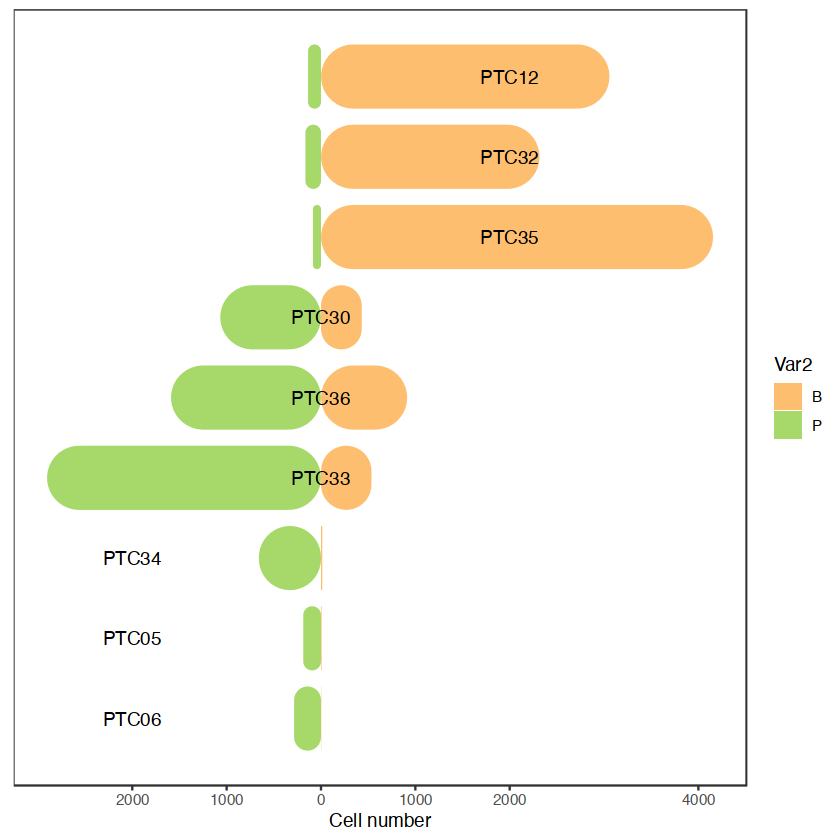

In [20]:
library(funkyheatmap)
wd = 0
new_heatmap_data2 = melt(right_data) %>%
  mutate(value_end=ifelse(Var2=='B', value+wd, -value-wd)) %>%
  mutate(patient_bar=ifelse(Var2=='B', wd, -wd)) 

label_data = right_data %>% as.data.frame() %>%
  mutate(label=ifelse(B>P, 2000, -2000)) %>%
  mutate(label=ifelse(B>400&B<1000, 0, label)) %>%
  mutate(patient = rownames(right_data))

a=ggplot()+
  geom_rounded_rect(mapping=aes(xmin=as.numeric(factor(Var1,col_order)) - 0.4,
                xmax=as.numeric(factor(Var1,col_order)) + 0.4,
                ymin=patient_bar,
                ymax=value_end, fill=Var2),data=new_heatmap_data2 %>% filter(Var2=='B'),
            radius = 0.5
            )+
  geom_rounded_rect(mapping=aes(xmin=as.numeric(factor(Var1,col_order)) - 0.4,
                                xmax=as.numeric(factor(Var1,col_order)) + 0.4,
                                ymax=patient_bar,
                                ymin=value_end, fill=Var2),data=new_heatmap_data2 %>% filter(Var2=='P'),
                    radius = 0.5
  )+
  #geom_rounded_rect(mapping=aes(xmin=as.numeric(factor(Var1)) - 0.4,
  #              xmax=as.numeric(factor(Var1)) + 0.4,
  #              ymin=-wd,
  #              ymax=wd,radius = 0.5, color=Var1), fill='white', 
  #              data=new_heatmap_data2)+
  geom_text(mapping=aes(x=as.numeric(factor(patient, col_order)), y=label, label=patient),
            data=label_data, color='black')+
  theme_bw()+
  scale_y_continuous(breaks=c(-2000,-1000,0,1000,2000,4000), labels = c(2000,1000,0,1000,2000,4000))+
  labs(y='Cell number')+
  scale_fill_manual(values = c(patient9_color, tissue_colors))+
  scale_color_manual(values = c(patient9_color, tissue_colors))+
  theme(panel.grid = element_blank(),
        axis.text.y = element_blank(),
        axis.title.y = element_blank(),
        axis.ticks.y=element_blank())+
  coord_flip()
a
#ggsave(glue('{output_dir}/B&Tsimilarity(bar_plot).pdf'),
#       plot = a, width = 5, height = 5)

# 张泽民:T与BPsimilarity

In [28]:
#saveRDS(query_all, '../organized_data/T与BPsimilarity(zzm).rds')
query_all = readRDS( '../organized_data/T与BPsimilarity(zzm).rds')
library(circlize)

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [32]:
pdf(glue('{output_dir}/B&Tsimilarityzzm.pd.pdf'), width=12, height=5)

patient_order = c()
for(p in names(query_all)){
  query_cell_res = query_all[[p]]
  xx=table(query_cell_res$ref_label)
  xx=(xx / sum(xx))['B']
  if(is.na(xx)){
    xx=0
  }
  patient_order = c(patient_order,xx)
}
patient_order = names(query_all)[order(patient_order, decreasing = T)]
patient_order = c("PTC12", "PTC32"  ,  "PTC35", "PTC30" ,  "PTC36" ,   "PTC33",   "PTC34" ,"PTC05" ,   "PTC06"   )
p='PTC12'
par(mfrow=c(1,9)) 
for(p in patient_order){
  query_cell_res = query_all[[p]]
  
  mat = srt@meta.data[srt$patient==p,'Tissue_desc', drop=F] %>% arrange(Tissue_desc) %>% as.data.frame()
  mat[mat$Tissue_desc=='P', 'x'] = 1:nrow(mat[mat$Tissue_desc=='P', , drop=F])
  mat[mat$Tissue_desc=='B', 'x'] = 1:nrow(mat[mat$Tissue_desc=='B', , drop=F])
  mat[mat$Tissue_desc=='T', 'x'] = 1:nrow(mat[mat$Tissue_desc=='T', , drop=F])
  mat$y=1
  mat$Tissue_desc = factor(mat$Tissue_desc, c('P', 'B', 'T'))
  ref_count_res = query_cell_res %>% group_by(ref_label) %>% summarise(ref_count = length(unique(ref_id)),
                                                                       query_count = n()) %>% as.data.frame()
  ref_count_res$cumsum_query = cumsum(ref_count_res$query_count)
  ref_count_res$cumsum_query_start = c(0, ref_count_res$cumsum_query[length(ref_count_res$cumsum_query)-1]+10)
  ref_count_res = ref_count_res %>% arrange(desc(ref_label))
  
  circos.clear()
  circos.par("track.height" = 0.2)
  circos.initialize(mat$Tissue_desc, x = mat$x)
  circos.track(mat$Tissue_desc, ylim = c(0, 1), 
               bg.col = tissue_colors[c('P', 'B',  'T')],
               bg.border='white',
               panel.fun = function(x, y) {
                 circos.text(CELL_META$xcenter, 
                             CELL_META$cell.ylim[2]/2, 
                             CELL_META$sector.index)
                 }
               )
  tmp_col = tissue_colors#c('B'="#FDBF6F80", 'P'='#A6D96A80')
  for(i in 1:nrow(ref_count_res)){
    tmp_to = ref_count_res[i,1]
    circos.link('T', c(ref_count_res$cumsum_query_start[i], ref_count_res$cumsum_query[i]),
                tmp_to, c(0, ref_count_res$ref_count[i]), 
                directional = 0,col=tmp_col[tmp_to], )
    
  }
  title(p)
  circos.clear()
}
dev.off()

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second link end is drawn out of sector 'P'.

Note: The first link end is drawn out of sector 'T'.

Note: The second link end is drawn out of sector 'B'.

Note: The second

pdf 
  2

# SNV

In [33]:
all_snv_strelka = readRDS('../organized_data/WES_strelka_snv.rds')
all_snv_varscan = readRDS('../organized_data/WES_varscan_snv.rds')

In [3]:
head(all_snv_strelka)

,CHROM,POS,REF,ALT,FILTER,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,sample,gene,pos_type,GT,snv_func,exonic_info
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1_10456_T_C,chr1,10456,T,C,LowEVS,0,2,1.00000000,1,0,0.00000000,chr1_10456_T_C,TC014_T1,"NONE(dist=NONE),DDX11L1(dist=1418)",intergenic,het,NA,NA
chr1_13250_G_A,chr1,13250,G,A,LowEVS,761,13,0.01679587,471,0,0.00000000,chr1_13250_G_A,TC014_T1,DDX11L1,ncRNA_exonic,het,NA,NA
chr1_13684_C_T,chr1,13684,C,T,LowEVS,268,9,0.03249097,134,2,0.01470588,chr1_13684_C_T,TC014_T1,DDX11L1,ncRNA_exonic,het,NA,NA
chr1_14574_A_G,chr1,14574,A,G,LowEVS,37,6,0.13953488,12,3,0.20000000,chr1_14574_A_G,TC014_T1,WASH7P,ncRNA_exonic,het,NA,NA
chr1_15089_C_A,chr1,15089,C,A,LowEVS,54,6,0.10000000,15,0,0.00000000,chr1_15089_C_A,TC014_T1,WASH7P,ncRNA_intronic,het,NA,NA
chr1_17329_A_G,chr1,17329,A,G,LowEVS,46,4,0.08000000,72,0,0.00000000,chr1_17329_A_G,TC014_T1,WASH7P,ncRNA_exonic,het,NA,NA


In [42]:
all_snv_strelka_filter = all_snv_strelka %>%
  filter(FILTER=='PASS')# %>%
  #filter(pos_type=='exonic')
all_snv_varscan_filter = all_snv_varscan %>%
  filter(FILTER=='Somatic')#%>%
  #filter(pos_type=='exonic')

In [43]:
dim(all_snv_strelka_filter)
dim(all_snv_varscan_filter)

[1] 9016382      18

[1] 572084     19

In [36]:
paired_list = list('PTC12'=c('TC028_B', 'TC028_T'),
                   'PTC19'=c('TC035_B', 'TC035_T'),
                   'PTC30'=c('TC045_B', 'TC045_T'),
                   'PTC32'=c('TC047_B', 'TC047_T'),
                   'PTC33'=c('TC048_B', 'TC048_T'),
                   'PTC34'=c('TC050_B', 'TC050_T'),
                   'PTC35'=c('TC054_B', 'TC054_T'),
                   'PTC36'=c('TC055_B', 'TC055_T'),
                   'PTC05'=c('TC014_B', 'TC014_T'),
                   'PTC06'=c('TC016_B', 'TC016_T')
                   
)

In [37]:
head(all_snv_varscan_filter)

,CHROM,POS,REF,ALT,FILTER,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,somatic_p_value,sample,gene,pos_type,GT,snv_func,exonic_info
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1_13868_A_G,1,13868,A,G,Somatic,11,13,0.5417,8,0,0.0000,chr1_13868_A_G,7.185762e-03,TC014_T1,DDX11L1,ncRNA_exonic,hom,NA,NA
chr1_17365_C_G,1,17365,C,G,Somatic,45,20,0.3077,72,14,0.1628,chr1_17365_C_G,2.817169e-02,TC014_T1,WASH7P,ncRNA_exonic,het,NA,NA
chr1_121009_C_T,1,121009,C,T,Somatic,4,7,0.6364,32,1,0.0303,chr1_121009_C_T,6.237565e-05,TC014_T1,"OR4F5(dist=51001),LOC729737(dist=13764)",intergenic,hom,NA,NA
chr1_129285_G_A,1,129285,G,A,Somatic,68,18,0.2093,78,5,0.0602,chr1_129285_G_A,4.000777e-03,TC014_T1,"OR4F5(dist=59277),LOC729737(dist=5488)",intergenic,hom,NA,NA
chr1_135203_G_A,1,135203,G,A,Somatic,18,7,0.2800,24,0,0.0000,chr1_135203_G_A,5.596004e-03,TC014_T1,LOC729737,ncRNA_exonic,hom,NA,NA
chr1_139943_G_T,1,139943,G,T,Somatic,17,10,0.3704,20,0,0.0000,chr1_139943_G_T,1.629235e-03,TC014_T1,LOC729737,ncRNA_intronic,hom,NA,NA


In [39]:
unique(all_snv_strelka_filter$sample)

[1] "TC014_T1" "TC014_T2" "TC016_T1" "TC016_T2" "TC028_T1" "TC028_T2"
 [7] "TC028_T3" "TC035_B"  "TC035_T"  "TC045_B"  "TC045_T"  "TC047_B" 
[13] "TC047_T"  "TC048_B"  "TC048_T"  "TC050_B"  "TC050_T"  "TC054_B" 
[19] "TC054_T"  "TC055_B"  "TC055_T"

In [44]:
all_snv_strelka_filter = all_snv_strelka_filter %>%
  filter(FILTER=='PASS')

all_snv_varscan_filter = all_snv_varscan_filter %>%
  filter(FILTER=='Somatic') %>%
  filter(somatic_p_value<0.05)

In [45]:
dim(all_snv_strelka_filter)
dim(all_snv_varscan_filter)

[1] 9016382      18

[1] 236246     19

In [150]:
head(all_snv_strelka_filter)

,CHROM,POS,REF,ALT,FILTER,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,sample,gene,pos_type,GT,snv_func,exonic_info
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1_121009_C_T,chr1,121009,C,T,PASS,5,6,0.5454545,35,1,0.02777778,chr1_121009_C_T,TC014_T,"OR4F5(dist=51001),LOC729737(dist=13764)",intergenic,het,NA,NA
chr1_139943_G_T,chr1,139943,G,T,PASS,7,10,0.5882353,17,0,0.00000000,chr1_139943_G_T,TC014_T,LOC729737,ncRNA_intronic,het,NA,NA
chr1_264481_G_A,chr1,264481,G,A,PASS,0,2,1.0000000,20,0,0.00000000,chr1_264481_G_A,TC014_T,"FAM138D(dist=57884),OR4F29(dist=186259)",intergenic,het,NA,NA
chr1_730019_C_A,chr1,730019,C,A,PASS,24,4,0.1428571,23,0,0.00000000,chr1_730019_C_A,TC014_T,LOC100288069,ncRNA_intronic,het,NA,NA
chr1_736849_G_A,chr1,736849,G,A,PASS,28,5,0.1515152,38,0,0.00000000,chr1_736849_G_A,TC014_T,LOC100288069,ncRNA_intronic,het,NA,NA
chr1_810319_G_T,chr1,810319,G,T,PASS,31,7,0.1842105,49,0,0.00000000,chr1_810319_G_T,TC014_T,"LOC100288069(dist=31685),FAM87B(dist=7052)",intergenic,het,NA,NA


In [ ]:
unique(all_snv_varscan_filter$pos_type)

[1] "ncRNA_exonic"          "intergenic"            "ncRNA_intronic"       
 [4] "downstream"            "intronic"              "upstream;downstream"  
 [7] "exonic"                "upstream"              "UTR5"                 
[10] "UTR3"                  "splicing"              "ncRNA_splicing"       
[13] "UTR5;UTR3"             "exonic;splicing"       "ncRNA_exonic;splicing"

In [47]:
# all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC028_T1'] = 'TC028_T'
# all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC028_T2'] = 'TC028_T'
all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC028_T3'] = 'TC028_B'
all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC014_T1'] = 'TC014_T'
all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC014_T2'] = 'TC014_B'
all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC016_T1'] = 'TC016_T'
all_snv_strelka_filter$sample[all_snv_strelka_filter$sample=='TC016_T2'] = 'TC016_B'

# all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC028_T1'] = 'TC028_T'
# all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC028_T2'] = 'TC028_T'
all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC028_T3'] = 'TC028_B'
all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC014_T1'] = 'TC014_T'
all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC014_T2'] = 'TC014_B'
all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC016_T1'] = 'TC016_T'
all_snv_varscan_filter$sample[all_snv_varscan_filter$sample=='TC016_T2'] = 'TC016_B'

In [48]:
 unique(c(all_snv_strelka_filter$sample, all_snv_varscan_filter$sample))

[1] "TC014_T"  "TC014_B"  "TC016_T"  "TC016_B"  "TC028_T1" "TC028_T2"
 [7] "TC028_B"  "TC035_B"  "TC035_T"  "TC045_B"  "TC045_T"  "TC047_B" 
[13] "TC047_T"  "TC048_B"  "TC048_T"  "TC050_B"  "TC050_T"  "TC054_B" 
[19] "TC054_T"  "TC055_B"  "TC055_T"

In [49]:
# 每个sample两个软件识别SNV交集
samples = unique(c(all_snv_strelka_filter$sample, all_snv_varscan_filter$sample))

snv_software = c()
tmp_list = list()
for(ss in samples){
  print(ss)
  tmp_keep_snvs = intersect(all_snv_strelka_filter[all_snv_strelka_filter$sample==ss,'snv'], 
                            all_snv_varscan_filter[all_snv_varscan_filter$sample==ss,'snv'])
  if(length(tmp_keep_snvs)>0){
    tmp_strelka = all_snv_strelka_filter %>%
      filter(sample==ss, snv%in%tmp_keep_snvs)
    rownames(tmp_strelka) = tmp_strelka$snv
    tmp_strelka2 = tmp_strelka[tmp_keep_snvs, c('ref_count', 'alt_count',  'alt_freq', 'ref_count_normal', 'alt_count_normal', 'alt_freq_normal')]
    
    tmp_varscan = all_snv_varscan_filter %>%
      filter(sample==ss, snv%in%tmp_keep_snvs)
    rownames(tmp_varscan) = tmp_varscan$snv
    tmp_varscan2 = tmp_varscan[tmp_keep_snvs, c('ref_count', 'alt_count',  'alt_freq', 'ref_count_normal', 'alt_count_normal', 'alt_freq_normal')]
    
    #pos = round(tmp_strelka2[tmp_keep_snvs, 'alt_freq'],2)==round(tmp_varscan2[tmp_keep_snvs, 'alt_freq'],2)
    tmp_strelka2 = tmp_strelka2#[pos,]
    tmp_varscan2 = tmp_varscan2#[pos,]
    
    #pos = tmp_strelka2[, 'alt_freq_normal']>0 & tmp_varscan2[, 'alt_freq_normal']>0
    #tmp_strelka2 = tmp_strelka2[pos,]
    #tmp_varscan2 = tmp_varscan2[pos,]
    
    
    tmp_new_snv = (tmp_strelka2 + tmp_varscan2) / 2
    tmp_new_snv$snv = rownames(tmp_new_snv)
    tmp_new_snv[,c('CHROM', 'POS', 'REF', 'ALT', 'gene', 'pos_type', 'GT', 'snv_func', 'exonic_info', 'sample')] = 
      tmp_varscan[tmp_new_snv$snv,c('CHROM', 'POS', 'REF', 'ALT', 'gene', 'pos_type', 'GT', 'snv_func', 'exonic_info', 'sample')]
  
    m1 = melt(as.matrix(tmp_strelka2))
    m2 = melt(as.matrix(tmp_varscan2))
    m1$varscan = m2$value
    
    a=ggplot(m1, aes(x=value,y=varscan))+
      geom_point()+
      facet_wrap(~Var2, scales = 'free', nrow=1)
    # plot(tmp_strelka[tmp_keep_snvs, 'alt_freq_normal'], tmp_varscan[tmp_keep_snvs, 'alt_freq_normal'])
    # plot(round(tmp_strelka[tmp_keep_snvs, 'alt_freq'],2), round(tmp_varscan[tmp_keep_snvs, 'alt_freq'],2))
    tmp_list[[ss]] = a
    snv_software = rbind(snv_software, tmp_new_snv)
  }
}

[1] "TC014_T"
[1] "TC014_B"
[1] "TC016_T"
[1] "TC016_B"
[1] "TC028_T1"
[1] "TC028_T2"
[1] "TC028_B"
[1] "TC035_B"
[1] "TC035_T"
[1] "TC045_B"
[1] "TC045_T"
[1] "TC047_B"
[1] "TC047_T"
[1] "TC048_B"
[1] "TC048_T"
[1] "TC050_B"
[1] "TC050_T"
[1] "TC054_B"
[1] "TC054_T"
[1] "TC055_B"
[1] "TC055_T"


In [50]:
dim(snv_software)

[1] 103970     17

In [ ]:
black_snp = all_snv_varscan %>% filter(FILTER=='Germline')
black_snp$POS = as.numeric(black_snp$POS)
black_snp = black_snp %>% filter(REF!=ALT) %>% filter(alt_freq_normal!=1,alt_freq_normal!=0)
black_snp = black_snp[,c('CHROM', 'POS', 'alt_freq_normal')]


In [ ]:
library(GenomicRanges)

In [ ]:
tmp_snv = as.numeric(snv_software$POS)
snv_gr = GRanges(snv_software$CHROM,
               IRanges(tmp_snv-50000, tmp_snv+50000),
               snv=snv_software$snv)

snp_gr = GRanges(black_snp$CHROM,
                 IRanges(as.numeric(black_snp$POS),as.numeric(black_snp$POS)),
                 alt_freq_normal=black_snp$alt_freq_normal)

hits = findOverlaps(snv_gr, snp_gr)
hits = as.data.frame(hits)
hits$alt_freq_normal = snp_gr[hits$subjectHits]$alt_freq_normal
hits$snv = snv_gr[hits$queryHits]$snv
mean_hits = hits %>%
  group_by(snv) %>%
  summarise(alt_freq_normal=mean(alt_freq_normal)) %>% as.data.frame()

snv_software$bad_value=mean_hits[match(snv_software$snv, mean_hits$snv), 'alt_freq_normal']


In [ ]:
write.table(snv_software, '../organized_data/snv_software.txt', sep='\t', row.names=F, quote=F)

In [51]:
snv_software = read.table('../organized_data/snv_software.txt', sep='\t', header=T)

In [52]:
dim(snv_software)

[1] 103970     18

In [53]:
snv_software$sample[snv_software$sample=='TC028_T1'] = 'TC028_T'
snv_software$sample[snv_software$sample=='TC028_T2'] = 'TC028_T'

In [55]:
sample_tissue=c('TC028_B'='B', 'TC028_T'='T',
                'TC035_B'='B', 'TC035_T'='T',
                'TC045_B'='B', 'TC045_T'='T',
                'TC047_B'='B', 'TC047_T'='T',
                'TC048_B'='B', 'TC048_T'='T',
                'TC050_B'='B', 'TC050_T'='T',
                'TC054_B'='B', 'TC054_T'='T',
                'TC055_B'='B', 'TC055_T'='T',
                'TC014_B'='B', 'TC014_T'='T',
                'TC016_B'='B', 'TC016_T'='T')

sample_patient = c('TC028_B'='PTC12', 'TC028_T'='PTC12',
                   'TC035_B'='PTC19', 'TC035_T'='PTC19',
                   'TC045_B'='PTC30', 'TC045_T'='PTC30',
                   'TC047_B'='PTC32', 'TC047_T'='PTC32',
                   'TC048_B'='PTC33', 'TC048_T'='PTC33',
                   'TC050_B'='PTC34', 'TC050_T'='PTC34',
                   'TC054_B'='PTC35', 'TC054_T'='PTC35',
                   'TC055_B'='PTC36', 'TC055_T'='PTC36',
                   'TC014_B'='PTC05', 'TC014_T'='PTC05',
                   'TC016_B'='PTC06', 'TC016_T'='PTC06')

snv_software$Tissue_desc = sample_tissue[snv_software$sample]
snv_software$patient = sample_patient[snv_software$sample]

In [58]:
head(snv_software)

,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,CHROM,POS,REF,ALT,gene,pos_type,GT,snv_func,exonic_info,sample,bad_value,Tissue_desc,patient
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,4.5,6.5,0.5909273,33.5,1,0.02903889,chr1_121009_C_T,1,121009,C,T,"OR4F5(dist=51001),LOC729737(dist=13764)",intergenic,hom,NA,NA,TC014_T,0.4001579,T,PTC05
2,12.0,10.0,0.4793176,18.5,0,0.00000000,chr1_139943_G_T,1,139943,G,T,LOC729737,ncRNA_intronic,hom,NA,NA,TC014_T,0.4562505,T,PTC05
3,27.5,63.0,0.6961538,28.0,4,0.12500000,chr1_1243650_G_A,1,1243650,G,A,C1QTNF12,intronic,het,NA,NA,TC014_T,0.5249448,T,PTC05
4,17.0,7.0,0.2916833,41.5,0,0.00000000,chr1_1298922_G_A,1,1298922,G,A,ACAP3,intronic,hom,NA,NA,TC014_T,0.5380038,T,PTC05
5,6.0,3.0,0.3333167,45.0,0,0.00000000,chr1_1348868_G_A,1,1348868,G,A,DVL1,intronic,hom,NA,NA,TC014_T,0.5653490,T,PTC05
6,22.0,13.0,0.3714143,40.0,0,0.00000000,chr1_1400912_C_T,1,1400912,C,T,MRPL20-AS1,ncRNA_exonic,hom,NA,NA,TC014_T,0.5530888,T,PTC05


In [74]:
share_snv_patient = list()
for(i in names(paired_list)){
  tmp_snv = c()
  for(s in paired_list[[i]]){
    if(length(tmp_snv)==0){
      tmp_snv = snv_software[snv_software$sample==s, 'snv']
    }else{
      tmp_snv = intersect(tmp_snv,snv_software[snv_software$sample==s, 'snv'])
    }
  }
  share_snv_patient[[i]] = tmp_snv
}

In [92]:
patient_order = c(
    'PTC12',
    'PTC32',
    'PTC35',
    'PTC30',
    'PTC36',
    'PTC33',
    'PTC34',
    'PTC05',
    'PTC06'
)

In [100]:
#tmp_p = 'PTC12'
tmp_idx = c()
for(tmp_p in patient_order){
    tmp_p_snv = snv_software %>% filter(patient==tmp_p) %>% filter(snv %in% share_snv_patient[[tmp_p]])
    tmp_p_snv_idx = c(max(tmp_p_snv$ref_count), max(tmp_p_snv$alt_count),max(tmp_p_snv$ref_count+tmp_p_snv$alt_count), min(tmp_p_snv$alt_freq),
                    min(tmp_p_snv$ref_count_normal), min(tmp_p_snv$alt_count_normal),max(tmp_p_snv$ref_count_normal+tmp_p_snv$alt_count_normal), min(tmp_p_snv$alt_freq_normal))
    tmp_idx = rbind(tmp_idx,tmp_p_snv_idx)
}
rownames(tmp_idx) = patient_order

In [86]:
head(snv_software)

,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,CHROM,POS,REF,ALT,gene,pos_type,GT,snv_func,exonic_info,sample,bad_value,Tissue_desc,patient
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,4.5,6.5,0.5909273,33.5,1,0.02903889,chr1_121009_C_T,1,121009,C,T,"OR4F5(dist=51001),LOC729737(dist=13764)",intergenic,hom,NA,NA,TC014_T,0.4001579,T,PTC05
2,12.0,10.0,0.4793176,18.5,0,0.00000000,chr1_139943_G_T,1,139943,G,T,LOC729737,ncRNA_intronic,hom,NA,NA,TC014_T,0.4562505,T,PTC05
3,27.5,63.0,0.6961538,28.0,4,0.12500000,chr1_1243650_G_A,1,1243650,G,A,C1QTNF12,intronic,het,NA,NA,TC014_T,0.5249448,T,PTC05
4,17.0,7.0,0.2916833,41.5,0,0.00000000,chr1_1298922_G_A,1,1298922,G,A,ACAP3,intronic,hom,NA,NA,TC014_T,0.5380038,T,PTC05
5,6.0,3.0,0.3333167,45.0,0,0.00000000,chr1_1348868_G_A,1,1348868,G,A,DVL1,intronic,hom,NA,NA,TC014_T,0.5653490,T,PTC05
6,22.0,13.0,0.3714143,40.0,0,0.00000000,chr1_1400912_C_T,1,1400912,C,T,MRPL20-AS1,ncRNA_exonic,hom,NA,NA,TC014_T,0.5530888,T,PTC05


In [156]:
black_list = read.table('../hg38-blacklist.v2.bed', sep='\t', header=F)
head(black_list)
dim(black_list)

,V1,V2,V3,V4
,<chr>,<int>,<int>,<chr>
1,chr10,0,45700,Low Mappability
2,chr10,38481300,38596500,High Signal Region
3,chr10,38782600,38967900,High Signal Region
4,chr10,39901300,41712900,High Signal Region
5,chr10,41838900,42107300,High Signal Region
6,chr10,42279400,42322500,High Signal Region


[1] 636   4

In [161]:
black_snvs = c()
for(i in 1:nrow(black_list)){
    tmp_chr = gsub('chr','', black_list[i,1])
    tmp_x = black_list[i,2]
    tmp_y = black_list[i,3]
    black_snv = snv_software %>% filter(CHROM==tmp_chr, POS>=tmp_x, POS<=tmp_y)
    black_snvs = rbind(black_snvs,black_snv)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


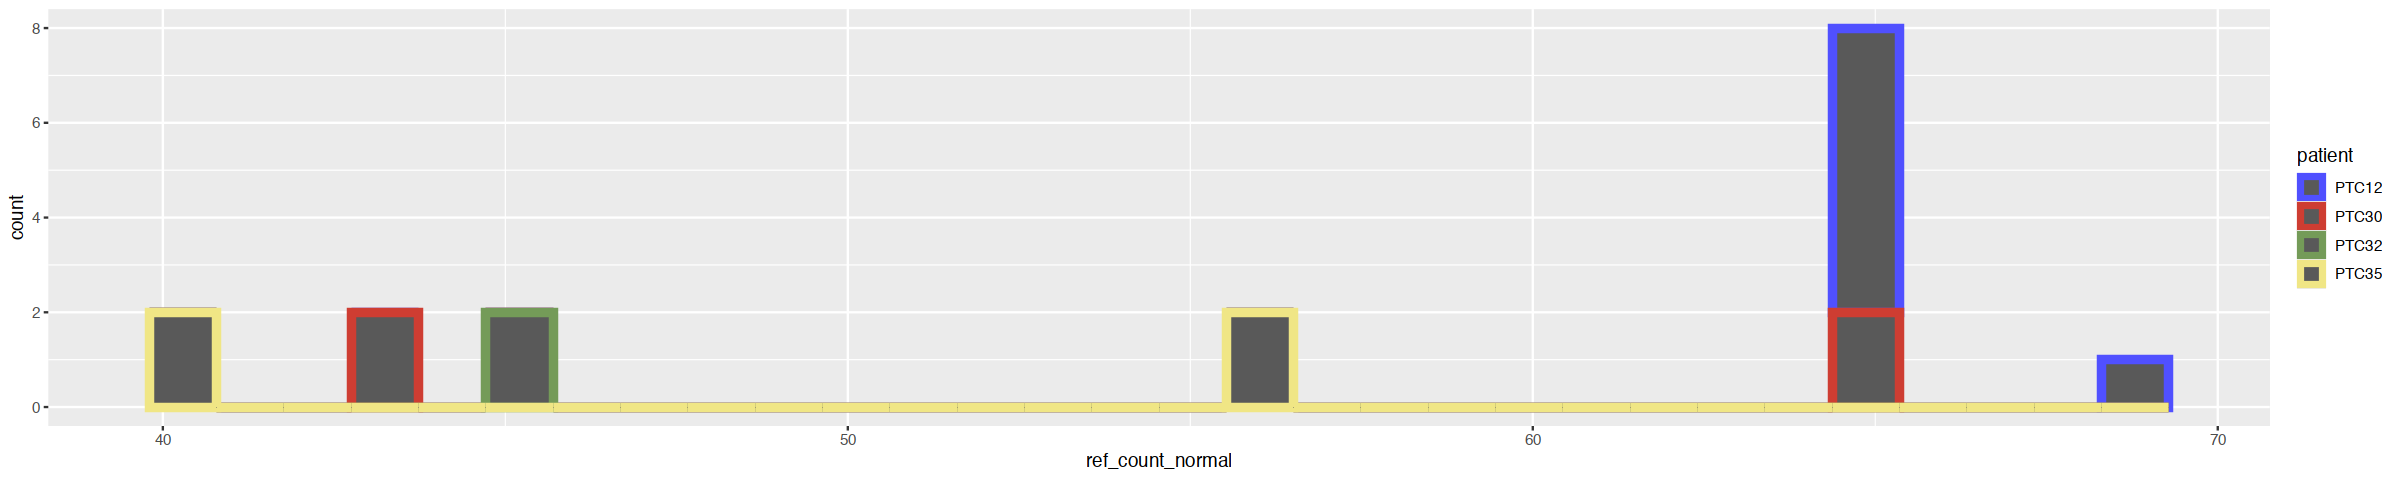

In [344]:
snv_software_filter = snv_software %>% 
  filter(!snv %in% black_snvs$snv) %>%
  filter(pos_type%in%c('exonic', 'ncRNA_exonic')) %>%
  mutate(coverage=ref_count+alt_count,
        normal_coverage = ref_count_normal+alt_count_normal) %>%
  filter(coverage>=20,#normal_coverage>=25,
         alt_freq_normal<=0.2,
         alt_freq>=0.2,
         alt_count_normal<=10,
         ref_count_normal>=40,
    # filter(
    #     coverage>=30,normal_coverage>=30,
    #      alt_freq_normal<0.2,
    #      alt_count_normal<=5,
    #     ref_count_normal>40
        ) %>%
  
    filter(snv %in% unlist(share_snv_patient)) %>%
    filter(!patient%in%c('PTC36', 'PTC33', 'PTC19')) %>%
    
    ggplot(aes(x=ref_count_normal, color=patient))+
    geom_histogram(size=2)+
    scale_color_igv() 
snv_software_filter

In [363]:
snv_software_filter = snv_software %>% 
  filter(!snv %in% black_snvs$snv) %>%
  filter(pos_type%in%c('exonic', 'ncRNA_exonic')) %>%
  mutate(coverage=ref_count+alt_count,
        normal_coverage = ref_count_normal+alt_count_normal) %>%
  filter(coverage>=20,
         alt_freq_normal<0.15,
                 alt_freq>=0.15,
         alt_count_normal<=10,
         ref_count_normal>=40,
    # filter(
    #     coverage>=30,normal_coverage>=30,
    #      alt_freq_normal<0.2,
    #      alt_count_normal<=5,
    #     ref_count_normal>=40
        )
  
    #filter(snv %in% unlist(share_snv_patient))%>%

In [364]:
snv_software_filter$share = 'None'
snv_software_filter[snv_software_filter$snv%in%unlist(share_snv_patient), 'share']='B-T share'

In [365]:
write.table(snv_software_filter, glue('{output_dir}/snv_filter.csv'), sep='\t', quote=F, row.names = F)

In [366]:
snv_software_filter = read.table(glue('{output_dir}/snv_filter.csv'), sep='\t', header=T)
head(snv_software_filter)

,ref_count,alt_count,alt_freq,ref_count_normal,alt_count_normal,alt_freq_normal,snv,CHROM,POS,REF,⋯,GT,snv_func,exonic_info,sample,bad_value,Tissue_desc,patient,coverage,normal_coverage,share
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,22.0,13,0.3714143,40.0,0.0,0.00000000,chr1_1400912_C_T,1,1400912,C,⋯,hom,NA,NA,TC014_T,0.5530888,T,PTC05,35.0,40.0,None
2,29.5,7,0.2002455,101.0,0.0,0.00000000,chr1_23019634_C_T,1,23019634,C,⋯,hom,nonsynonymous SNV,"KDM1A:NM_015013:exon1:c.C38T:p.A13V,KDM1A:NM_001363654:exon1:c.C38T:p.A13V,KDM1A:NM_001009999:exon1:c.C38T:p.A13V,",TC014_T,0.5726205,T,PTC05,36.5,101.0,None
3,17.0,5,0.2272864,44.0,0.0,0.00000000,chr1_38991498_C_A,1,38991498,C,⋯,hom,nonsynonymous SNV,"AKIRIN1:NM_024595:exon1:c.C118A:p.P40T,AKIRIN1:NM_001136275:exon1:c.C118A:p.P40T,",TC014_T,0.5841402,T,PTC05,22.0,44.0,None
4,16.0,5,0.2386364,45.5,0.0,0.00000000,chr1_45205879_C_T,1,45205879,C,⋯,hom,nonsynonymous SNV,"ZSWIM5:NM_020883:exon1:c.G472A:p.A158T,",TC014_T,0.5757889,T,PTC05,21.0,45.5,None
5,32.0,12,0.2649627,43.5,1.5,0.02830189,chr1_149390832_A_C,1,149390832,A,⋯,hom,synonymous SNV,"NOTCH2NLC:NM_001364013:exon1:c.A45C:p.G15G,",TC014_T,0.5365059,T,PTC05,44.0,45.0,None
6,15.0,5,0.2500000,42.0,0.5,0.01165000,chr2_158658620_G_A,2,158658620,G,⋯,hom,NA,NA,TC014_T,0.5553305,T,PTC05,20.0,42.5,None


In [367]:
snv_software_melt = snv_software_filter %>%
  reshape2::dcast(snv+patient+pos_type+snv_func+share~Tissue_desc,
                  fun.aggregate = mean, value.var = 'alt_freq',
                  fill = 0) 



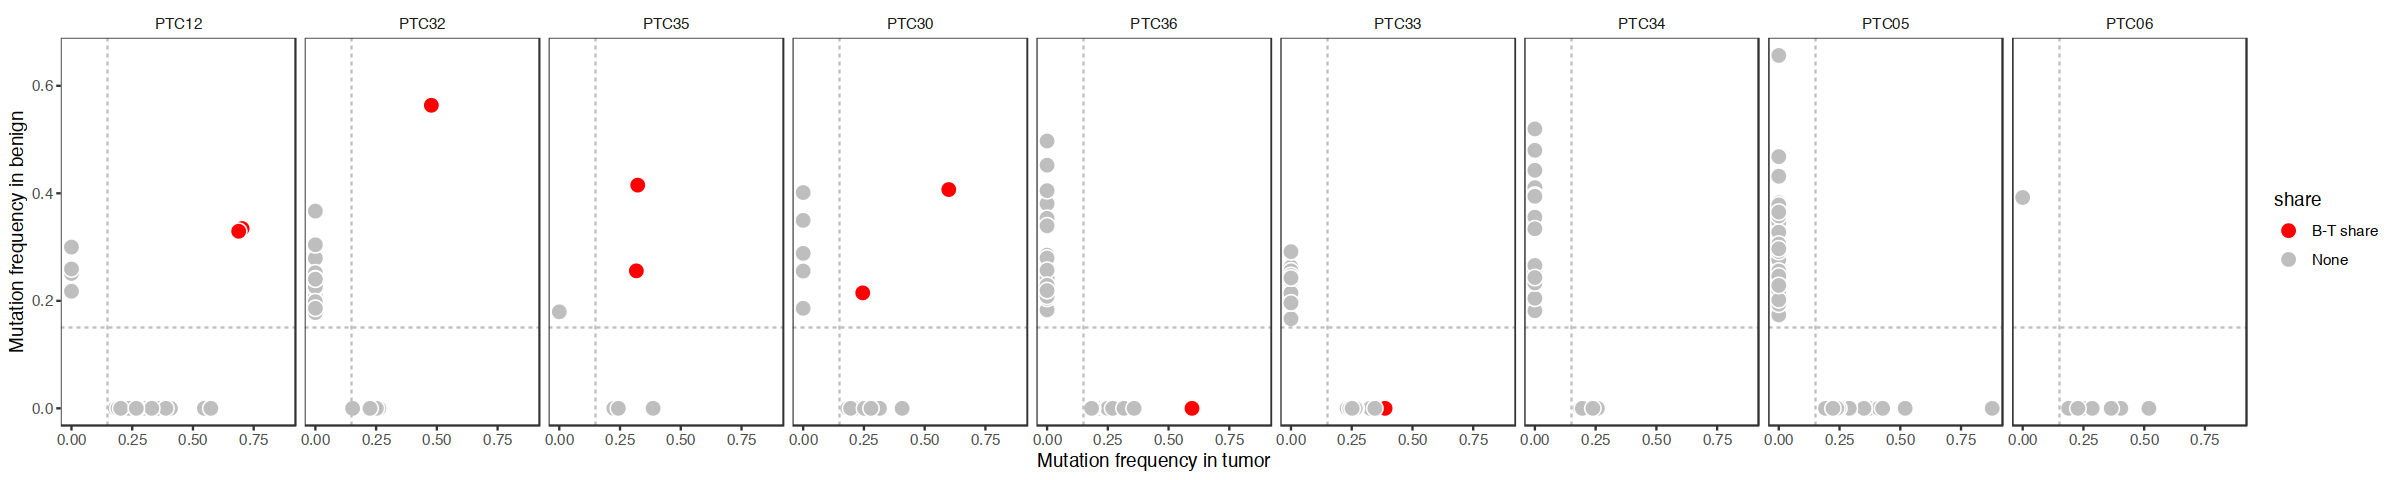

In [387]:
options(repr.plot.width=20, repr.plot.height=4)



a = snv_software_melt %>%
   filter(patient!='PTC19') %>%
    #filter(!pos_type%in%c('intronic', 'ncRNA_intronic', 'intergenic', 'UTR3', 'UTR5', 'downstream', 'upstream')) %>%
    
    mutate(patient=factor(patient, patient_order)) %>%
  #filter(snv_type=='exonic') %>%
  #filter(share=='B-T share') %>%
  ggplot(aes(x=`T`, y=B))+
  geom_point(aes(fill=share), color='white',alpha=1, size=4, shape=21)+
  #geom_text_repel(data=label_freq,mapping = aes(label=label4), size=3)+
  facet_wrap(~patient, nrow=1)+
  geom_hline(yintercept = 0.15, color='gray', linetype='dashed', linewidth=0.5)+
  geom_vline(xintercept = 0.15, color='gray', linetype='dashed', linewidth=0.5)+
  #scale_color_igv()+
  scale_fill_manual(values = c('B-T share'='red', 'None'='gray'))+
  labs(x='Mutation frequency in tumor',y='Mutation frequency in benign')+
  theme_bw()+
  theme(panel.grid = element_blank(),
        strip.background = element_blank())
a
ggsave(glue('{output_dir}/WES_SNV共享scatter_plot.pdf'), plot = a,  
      width = 21, height = 3, dpi = 450, bg = 'transparent')


In [369]:
xx=snv_software_melt %>%
  filter(share=='B-T share') 
xx=all_snv_strelka_filter[all_snv_strelka_filter$snv%in%xx$snv, ]

label_freq = snv_software_melt[snv_software_melt$share!='None',]
ann_res = data.frame('snv'=xx$snv,'ann'=sapply(strsplit(xx$exonic_info, ',|:'), function(x){paste0(x[1],':',x[length(x)])}))
ann_res = data.frame('snv'=xx$snv,'ann'=paste0(xx$gene,'\n',xx$snv))

ann_res = ann_res %>% unique()
ann_res_vector = ann_res$ann
names(ann_res_vector) = ann_res$snv
label_freq$label = ann_res_vector[label_freq$snv]
label_freq = label_freq %>%
  filter(patient%in%c('PTC12', 'PTC32','PTC35','PTC30'))

In [370]:
min(snv_software_melt$B[snv_software_melt$B>0])

[1] 0.1666667

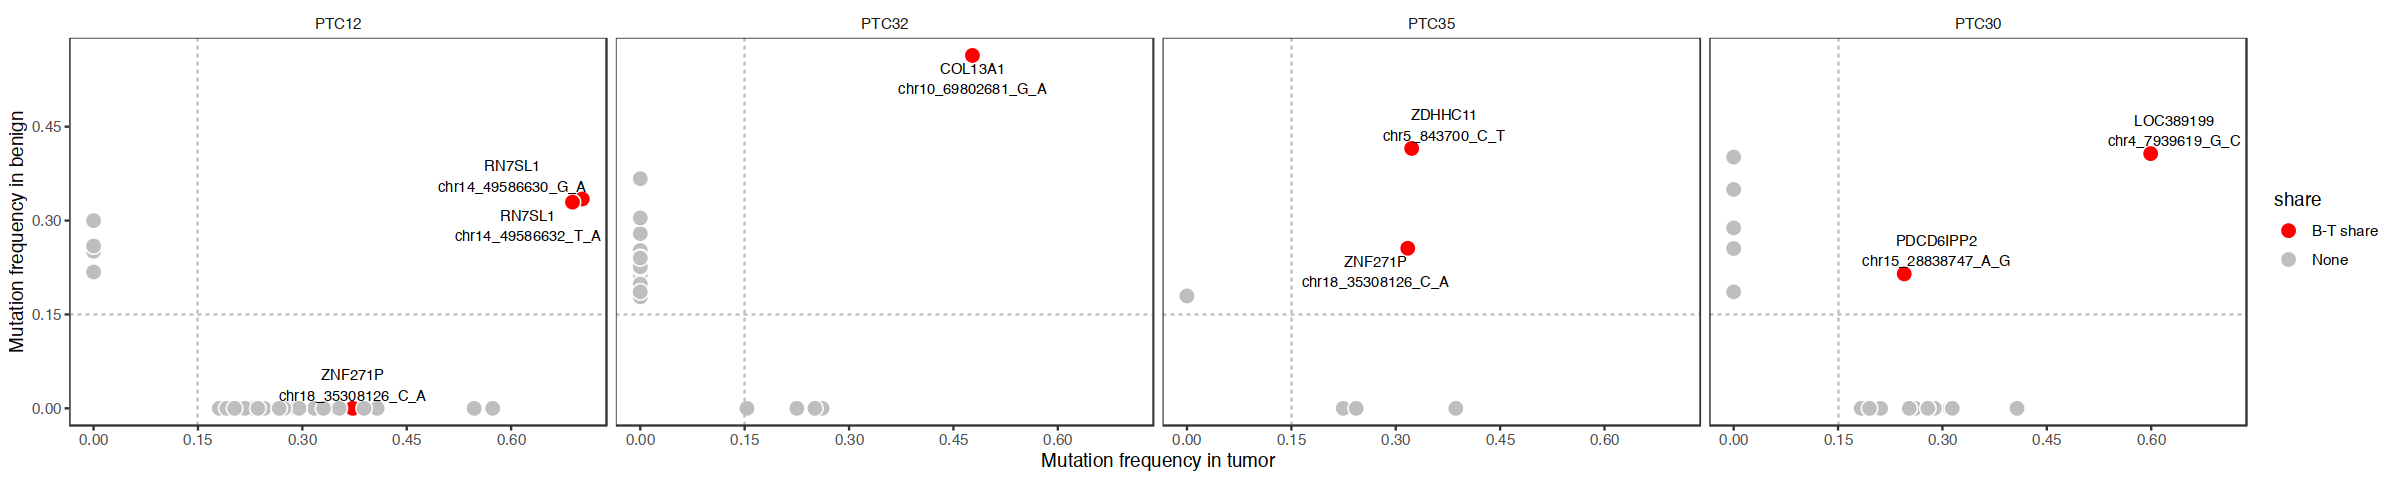

In [377]:
a=snv_software_melt %>%
  filter(patient%in%c('PTC12', 'PTC32','PTC35','PTC30')) %>%
  filter(patient!='PTC19') %>%
  mutate(patient=factor(patient, c('PTC12', 'PTC32','PTC35','PTC30'))) %>%
  ggplot(aes(x=`T`, y=B))+
  geom_point(aes(fill=share), color='white',alpha=1, size=4, shape=21)+
  geom_text_repel(data=label_freq %>%mutate(patient=factor(patient, c('PTC12', 'PTC32','PTC35','PTC30'))) ,
                  mapping = aes(label=label), size=3)+
  facet_wrap(~patient, nrow=1)+
  geom_hline(yintercept = 0.15, color='gray', linetype='dashed', linewidth=0.5)+
  geom_vline(xintercept = 0.15, color='gray', linetype='dashed', linewidth=0.5)+
  scale_fill_manual(values = c('B-T share'='red', 'None'='gray'))+
  labs(x='Mutation frequency in tumor',y='Mutation frequency in benign')+
  scale_x_continuous(breaks=c(0,0.15,0.3,0.45,0.6))+
  scale_y_continuous(breaks=c(0,0.15,0.3,0.45,0.6))+
  theme_bw()+
  theme(panel.grid = element_blank(),
        strip.background = element_blank())
a
ggsave(glue('{output_dir}/WES_SNV共享scatter_plot2.pdf'), plot = a,  
      width = 11, height = 3, dpi = 450, bg = 'transparent')

# SingleCell SNV

In [357]:
snv_list = readRDS( './SNV/SComatic/output/snv_filter_genome_pos_优先找T.rds')

In [693]:
head(all_info)

,gene_name,snv,chrom,position,ref,var,normal_reads1,normal_reads2,normal_var_freq,normal_gt,⋯,tumor_reads1_minus,tumor_reads2_plus,tumor_reads2_minus,normal_reads1_plus,normal_reads1_minus,normal_reads2_plus,normal_reads2_minus,SC_prop_in_T,SC_prop_in_B,patient
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,PRKCZ,chr1_2104824_G_A,1,2104824,G,A,5,0,0.0000,G,⋯,0,5,18,1,4,0,0,0.009756098,0,PTC05
3,SMIM1,chr1_3772844_G_A,1,3772844,G,A,13,0,0.0000,G,⋯,0,9,0,13,0,0,0,0.014634146,0,PTC05
4,SPSB1,chr1_9294534_T_C,1,9294534,T,C,20,0,0.0000,T,⋯,5,0,12,1,19,0,0,0.000000000,0,PTC05
5,LUZP1,chr1_23177551_T_C,1,23177551,T,C,14,0,0.0000,T,⋯,0,3,3,13,1,0,0,0.004878049,0,PTC05
6,SLC9A1,chr1_27154476_A_G,1,27154476,A,G,25,0,0.0000,A,⋯,9,7,0,15,10,0,0,0.004878049,0,PTC05
8,SLC9A1,chr1_27154520_A_G,1,27154520,A,G,51,1,0.0192,A,⋯,13,9,0,43,8,1,0,0.000000000,0,PTC05


In [696]:
all_info = c()
for(p in names(snv_list)){
  print(p)
  tmp_info = snv_list[[p]]$snv_T
  tmp_info$patient = p
  all_info = rbind(all_info, tmp_info)
}

library(ggrepel)

[1] "PTC05"
[1] "PTC06"
[1] "PTC12-T1"
[1] "PTC12-T2"
[1] "PTC30"
[1] "PTC32"
[1] "PTC33"
[1] "PTC34"
[1] "PTC35"
[1] "PTC36"


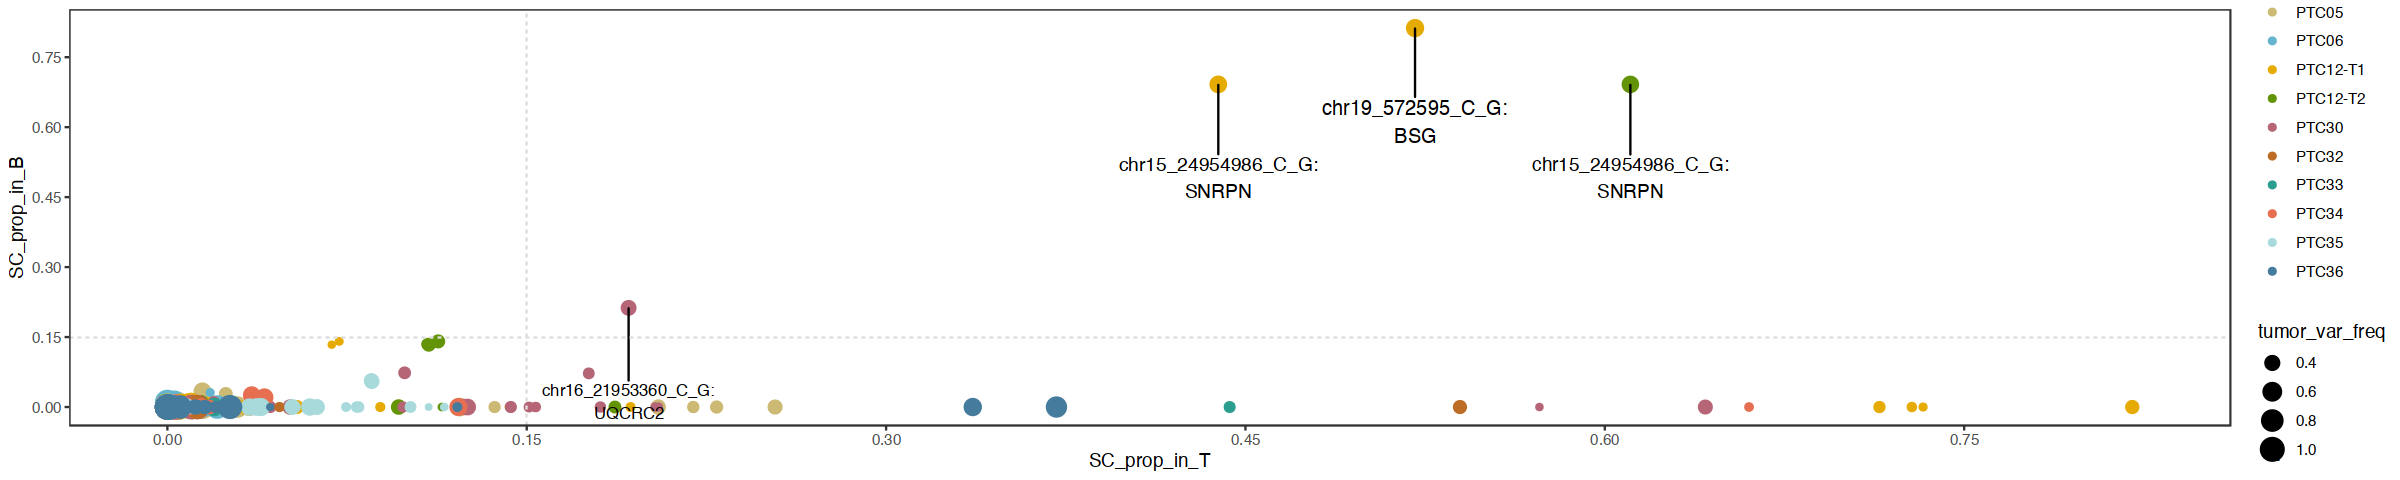

In [700]:

label_data = all_info%>%dplyr::filter(SC_prop_in_T>=0.15,SC_prop_in_B>=0.15)
a=all_info %>%
  ggplot(aes(x=SC_prop_in_T, y=SC_prop_in_B, size=tumor_var_freq, color=patient))+
  geom_point()+
  geom_text_repel(aes(x=SC_prop_in_T, y=SC_prop_in_B, label=paste0(snv, ':\n',gene_name )), 
                  data = label_data, color='black', nudge_y = -0.2)+
  geom_hline(yintercept = 0.15, linetype='dashed', color='#dddddd')+
  geom_vline(xintercept = 0.15, linetype='dashed', color='#dddddd')+
  scale_color_manual(values=all_patient_color)+
    scale_x_continuous(breaks=c(0,0.15,0.3,0.45,0.6,0.75))+
  scale_y_continuous(breaks=c(0,0.15,0.3,0.45,0.6,0.75))+
  theme_bw()+
  theme(panel.grid = element_blank())
a
ggsave(glue('{output_dir}/SC_SNV共享scatter_plot.pdf'), plot = a,  
      width = 6, height = 4, dpi = 450, bg = 'transparent')

In [758]:
colnames(label_data)

[1] "gene_name"           "snv"                 "chrom"              
 [4] "position"            "ref"                 "var"                
 [7] "normal_reads1"       "normal_reads2"       "normal_var_freq"    
[10] "normal_gt"           "tumor_reads1"        "tumor_reads2"       
[13] "tumor_var_freq"      "tumor_gt"            "somatic_status"     
[16] "variant_p_value"     "somatic_p_value"     "tumor_reads1_plus"  
[19] "tumor_reads1_minus"  "tumor_reads2_plus"   "tumor_reads2_minus" 
[22] "normal_reads1_plus"  "normal_reads1_minus" "normal_reads2_plus" 
[25] "normal_reads2_minus" "SC_prop_in_T"        "SC_prop_in_B"       
[28] "patient"

In [761]:
label_data[,c('snv', 'normal_reads1','normal_reads2','tumor_reads1','tumor_reads2','patient')]

,snv,normal_reads1,normal_reads2,tumor_reads1,tumor_reads2,patient
,<chr>,<int>,<int>,<int>,<int>,<chr>
1072,chr15_24954986_C_G,6858,2,2785,2542,PTC12-T1
157,chr19_572595_C_G,6077,283,2705,2775,PTC12-T1
1161,chr15_24954986_C_G,6858,2,3949,3455,PTC12-T2
2362,chr16_21953360_C_G,1090,0,2024,1270,PTC30


In [763]:
2785+2542+6858

[1] 12185

# SingleCell mtDNA

In [383]:
mtDNA_list = readRDS('./SNV/mtDNA/output/mtDNA_list.rds')
mtDNA_df = readRDS('./SNV/mtDNA/output/mtDNA_df.rds')

In [384]:
### 过滤 mtDNA ###
all_tmp_df = c()
for(p in names(mtDNA_df)){
  #p='PTC12'
  tmp_mtDNA = mtDNA_df[[p]]
  tmp_af =tmp_mtDNA$af
  #tmp_af[tmp_af<0.5] = 0
  af_meta = tmp_mtDNA$af_meta
  # 过滤突变比例低于10%的位点
  #tmp_af = tmp_af[,colSums(tmp_af>0) > 0.1 * nrow(tmp_af)]
  
  tmp_af_P = tmp_af[af_meta$Tissue_desc=='P',]
  #tmp_af_P[,colSums(tmp_af_P>0) > 0.5 * nrow(tmp_af_P)]
  
  tmp_af_B = tmp_af[af_meta$Tissue_desc=='B',]
  tmp_af_T = tmp_af[af_meta$Tissue_desc=='T',]
  
  tmp_df = data.frame('P'=apply(tmp_af_P,2, function(x){sum(x>0.3)/length(x)}),#mean(x) 
                      'B'=apply(tmp_af_B,2, function(x){sum(x>0.3)/length(x)}),#mean(x) 
                      'T'=apply(tmp_af_T,2, function(x){sum(x>0.3)/length(x)}),#mean(x)
                      'patient'=p)
  all_tmp_df = rbind(all_tmp_df, tmp_df)
}


In [793]:
head(tmp_mtDNA$af)

,740G>A,1315G>A,1742G>A,1748G>A,1750G>A,1754G>A,1760G>A,1768G>A,2032G>A,2121G>A,⋯,1314C>T,1380G>T,1382A>T,1749C>T,1764C>T,2289G>T,2617A>T,5987C>T,6356C>T,7328C>T
AAACCTGAGAAACCAT-1,0.000000000,0.9285714,0,0,0,0,0.000000000,0,0,0,⋯,0.9285714,0.0,0.0,0.006060606,0,0.06060606,0.3125000,0,0,0
AAACCTGAGGCTCAGA-1,0.000000000,0.0000000,0,0,0,0,0.000000000,0,0,0,⋯,0.0000000,0.5,0.5,0.000000000,0,0.00000000,0.5000000,0,0,0
AAACCTGAGGGCATGT-1,0.000000000,0.0000000,0,0,0,0,0.000000000,0,0,0,⋯,0.0000000,0.0,0.0,0.000000000,0,0.00000000,0.0000000,0,0,0
AAACCTGCACAACGCC-1,0.004210526,0.0000000,0,0,0,0,0.002773925,0,0,0,⋯,0.0000000,0.0,0.0,0.000000000,0,0.11510791,0.3333333,0,0,0
AAACCTGCAGTCGATT-1,0.000000000,0.0000000,0,0,0,0,0.000000000,0,0,0,⋯,0.0000000,0.0,0.0,0.000000000,0,0.20000000,0.0000000,0,0,0
AAACCTGGTCTAAACC-1,0.000000000,0.0000000,0,0,0,0,0.000000000,0,0,0,⋯,0.0000000,0.0,0.0,0.000000000,0,0.00000000,0.0000000,0,0,0


In [385]:
head(all_tmp_df)

,P,B,T,patient
,<dbl>,<dbl>,<dbl>,<chr>
769G>A,0.002192982,0.00000000,0.00000000,PTC05
901G>A,0.000000000,0.00000000,0.00000000,PTC05
1315G>A,0.037280702,0.01123596,0.01463415,PTC05
1748G>A,0.000000000,0.00000000,0.00000000,PTC05
1760G>A,0.000000000,0.00000000,0.00000000,PTC05
1816G>A,0.000000000,0.00000000,0.02926829,PTC05


In [386]:
label_all_tmp_df =all_tmp_df %>%filter(P<0.05,B>0.05,`T`>0.05)
label_all_tmp_df$names= sapply(rownames(label_all_tmp_df), function(x)substr(x,1,nchar(x)-1))
all_tmp_df$sig = 'no'
all_tmp_df[rownames(label_all_tmp_df), 'sig']='yes'


In [395]:

a=all_tmp_df %>%
  filter(P<0.05) %>%
  #filter(P<B) %>%
  #filter(B<`T`) %>%
  ggplot(aes(x=`T`, y=B))+
  #geom_point(aes(color=sig, size=4),alpha=0.8)+
    geom_point(aes(fill=sig), color='white',alpha=1, size=4, shape=21)+
  geom_hline(yintercept = 0.05, color='gray', linetype='dashed', size=0.5)+
  geom_vline(xintercept = 0.05, color='gray', linetype='dashed', size=0.5)+
  facet_wrap(~patient, nrow=1)+
  geom_text_repel(mapping = aes(label=names), data=label_all_tmp_df)+
  #lims(x=c(0,0.1))+
  scale_x_continuous(breaks=c(0,0.1,0.2,0.3,0.4))+
  scale_y_continuous(breaks=c(0,0.05,0.1))+
  scale_fill_manual(values = c('no'='gray', 'yes'='red'))+
  theme_bw()+
  theme(panel.grid = element_blank(),
        strip.background = element_blank())
ggsave(glue('{output_dir}/SC_mtDNA共享scatter_plot.pdf'), plot = a,  
      width = 21, height = 3, dpi = 450, bg = 'transparent')


# WES_SNV IGV

In [427]:
library(Rsamtools)

In [438]:
library(Gviz)
library(BSgenome.Hsapiens.UCSC.hg38)
library(EnsDb.Hsapiens.v86)
options(ucscChromosomeNames = FALSE)

In [645]:
cyto <- read.table("'../cytoBand.txt.gz'", sep="\t",
                   col.names = c("chrom","chromStart","chromEnd","name","gieStain"))
itrack <- IdeogramTrack(genome = 'hg38', chromosome = chr,bands = cyto)
sTrack <- SequenceTrack(Hsapiens)
gtrack <- GenomeAxisTrack()


In [740]:

base_colors <- c("A" = "#abd9e9", "C" = "#fdae61", "G" = "#d7191c", "T" = "#2c7bb6",'NoSNV'='#dddddd')
#alt_freq_thr = 0.15
pos_range=10

## PTC12

pdf 
  2

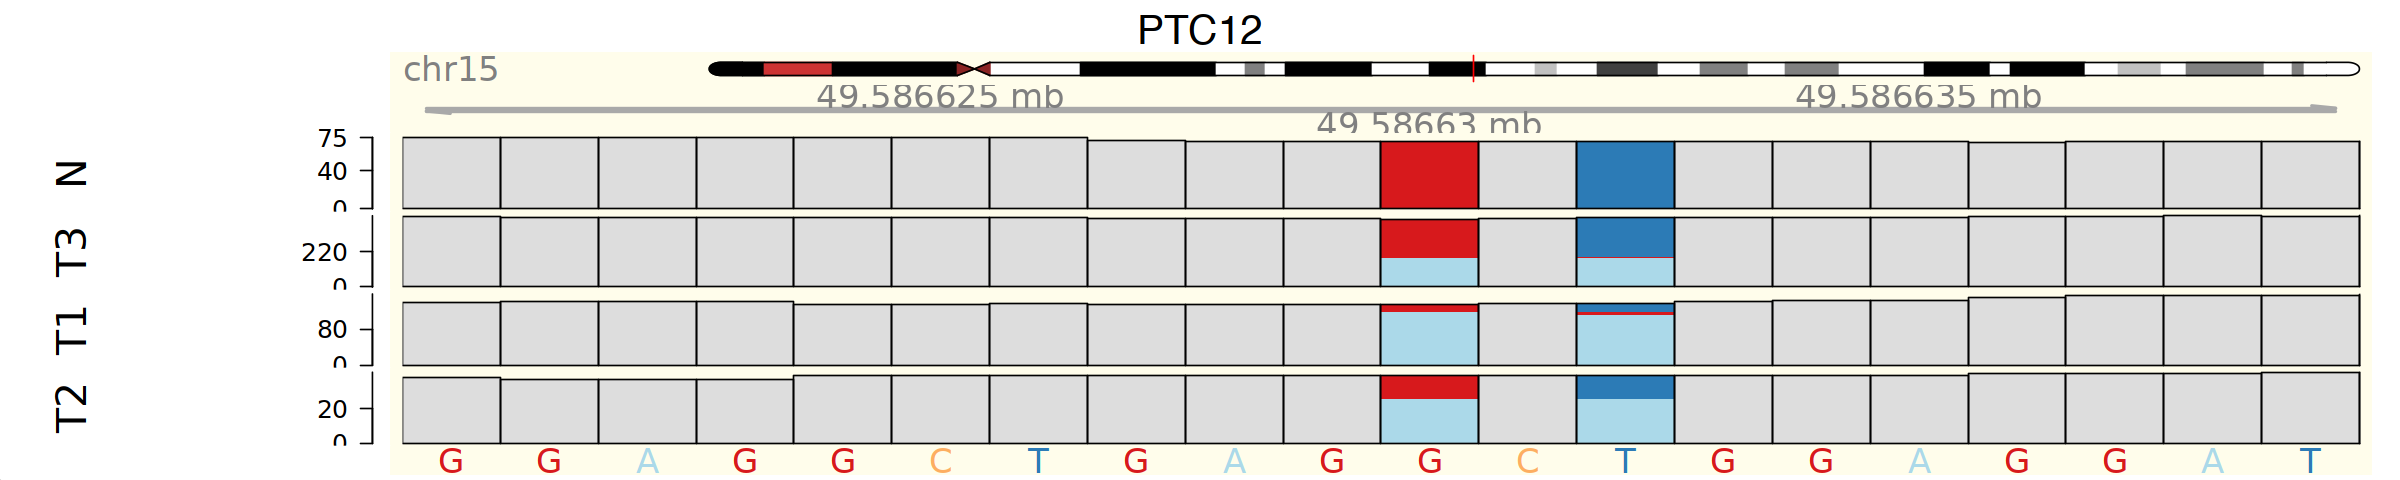

In [742]:
p='PTC12'
snv = 'chr14_49586630_G_A'
tissues = c('P', 'T3','T1','T2')
gene_name='RN7LSL1'
color_pos = c(pos_range+1, pos_range+3)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

## PTC32

pdf 
  2

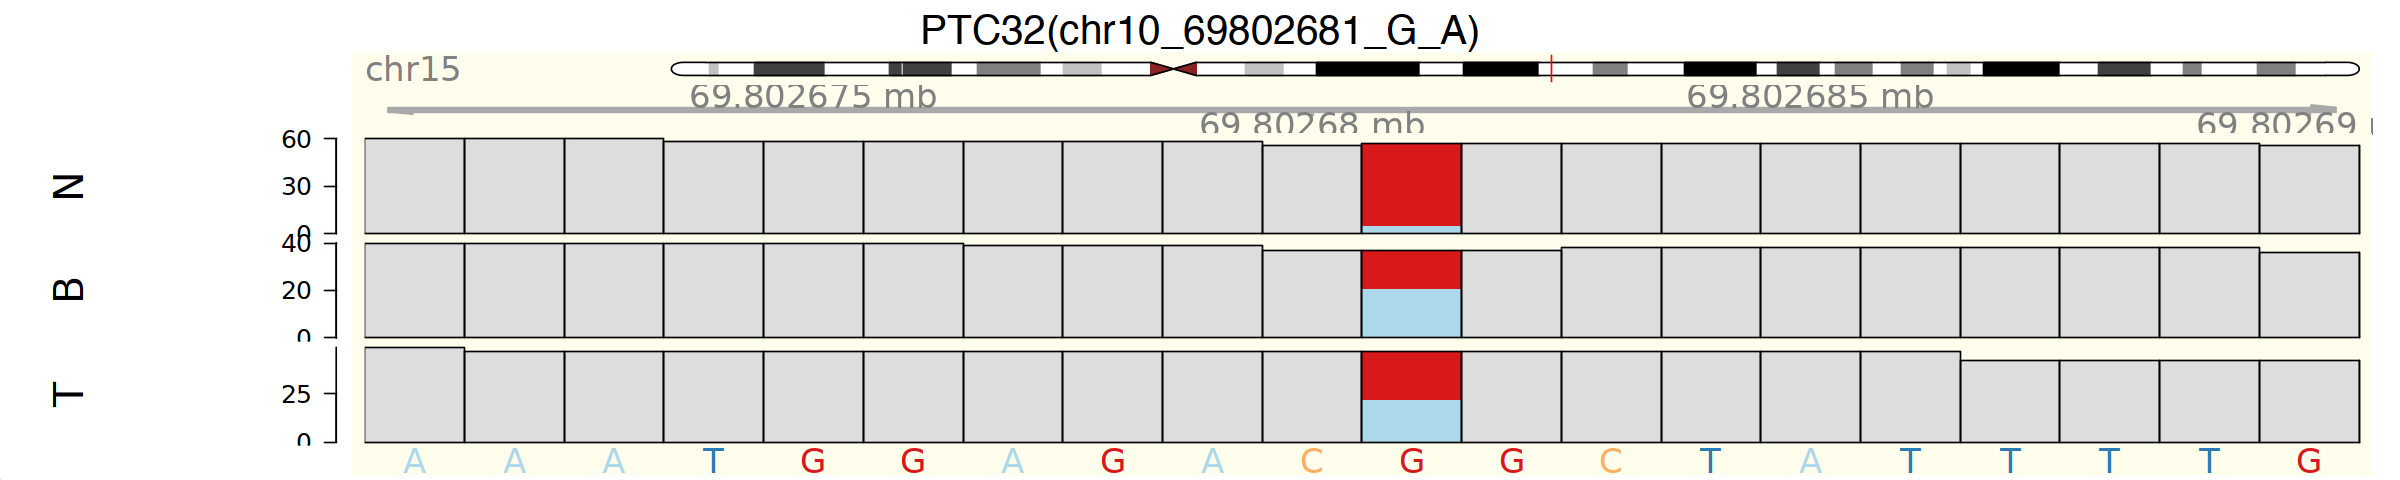

In [743]:
p='PTC32'
snv = 'chr10_69802681_G_A'
tissues = c('P', 'B','T')
gene_name='COL13A1'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

## PTC35

pdf 
  2

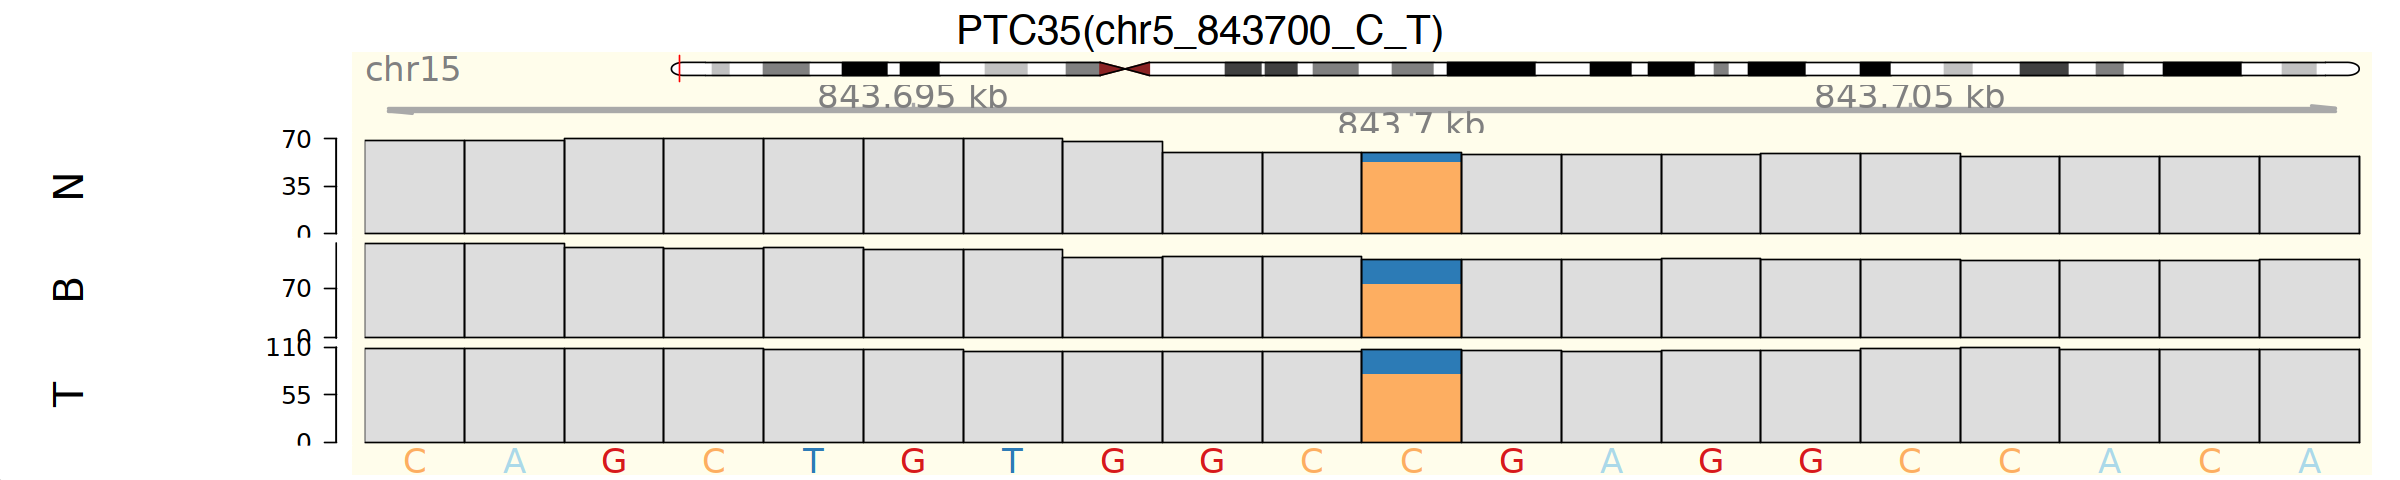

In [744]:
p='PTC35'
snv = 'chr5_843700_C_T'
tissues = c('P', 'B','T')
gene_name='ZDHHC11'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

pdf 
  2

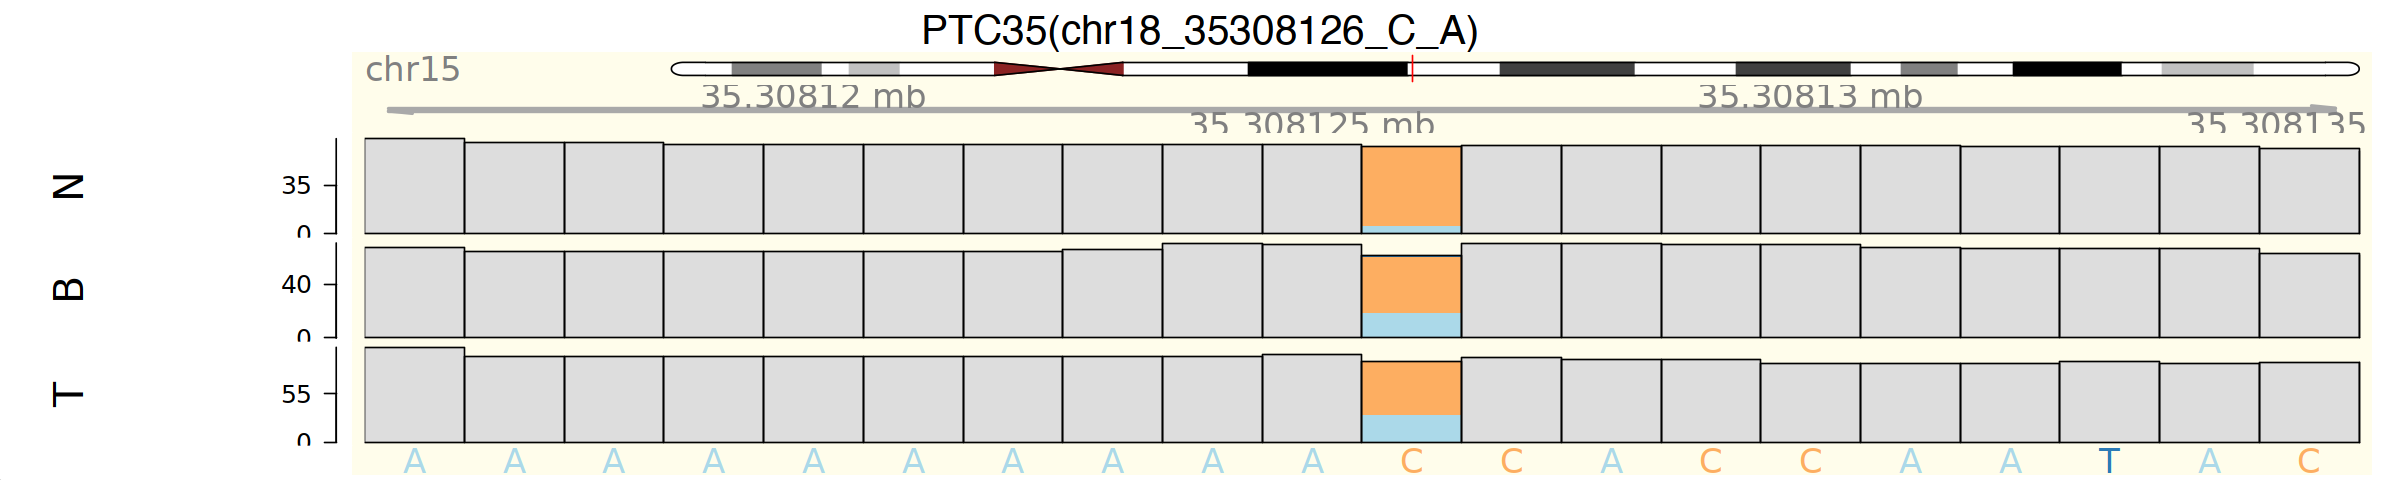

In [745]:
p='PTC35'
snv = 'chr18_35308126_C_A'
tissues = c('P', 'B','T')
gene_name='ZNF271P'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

## PTC30

pdf 
  2

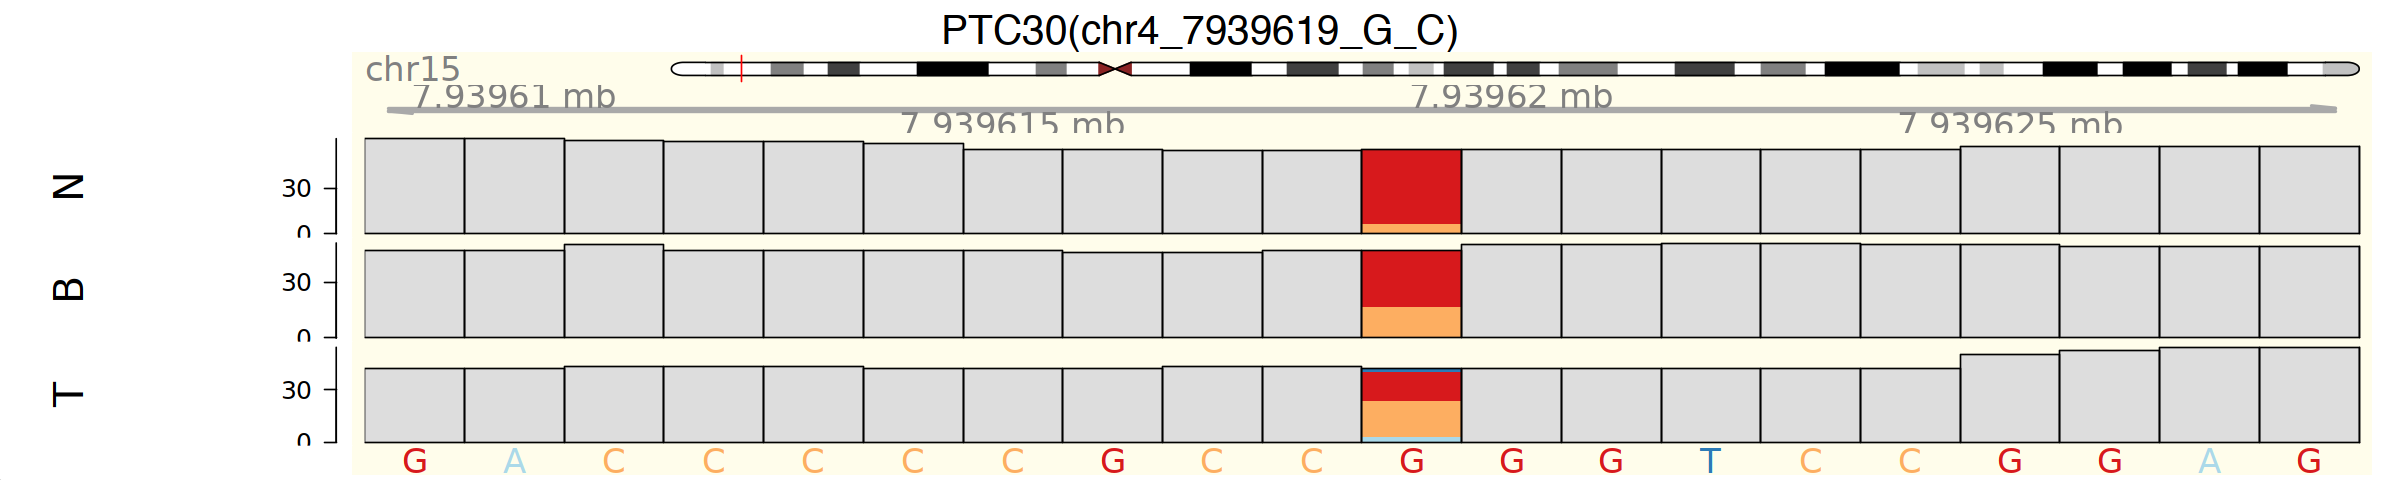

In [746]:
p='PTC30'
snv = 'chr4_7939619_G_C'
tissues = c('P', 'B','T')
gene_name='LOC389199'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

pdf 
  2

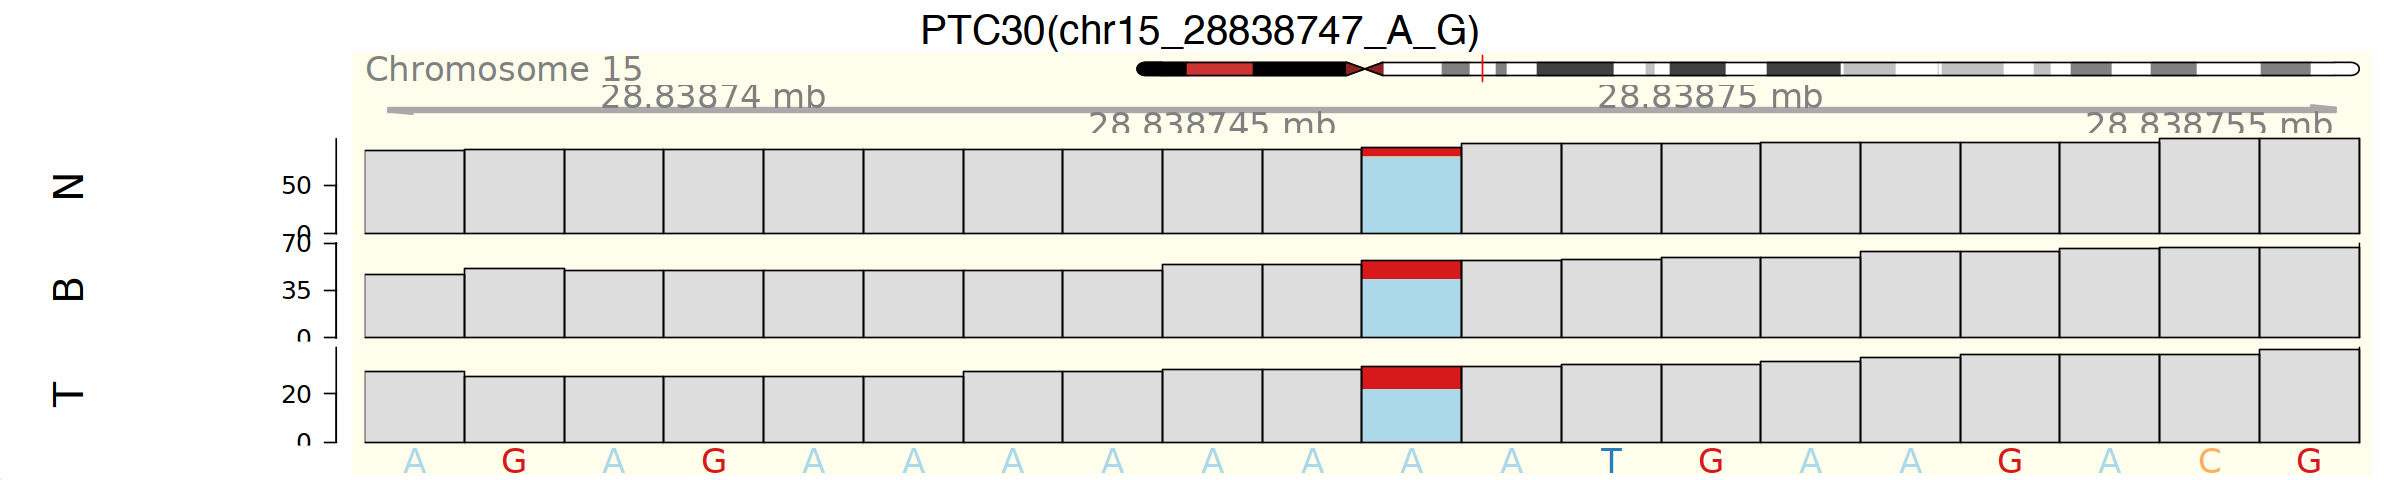

In [747]:
p='PTC30'
snv = 'chr15_28838747_A_G'
tissues = c('P', 'B','T')
gene_name='PDCD6IPP2'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/WES_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end))),
      pileupParam = PileupParam(
          max_depth = 100000,
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 0
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/{p}_WES_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

# SC SNV IGV

pdf 
  2

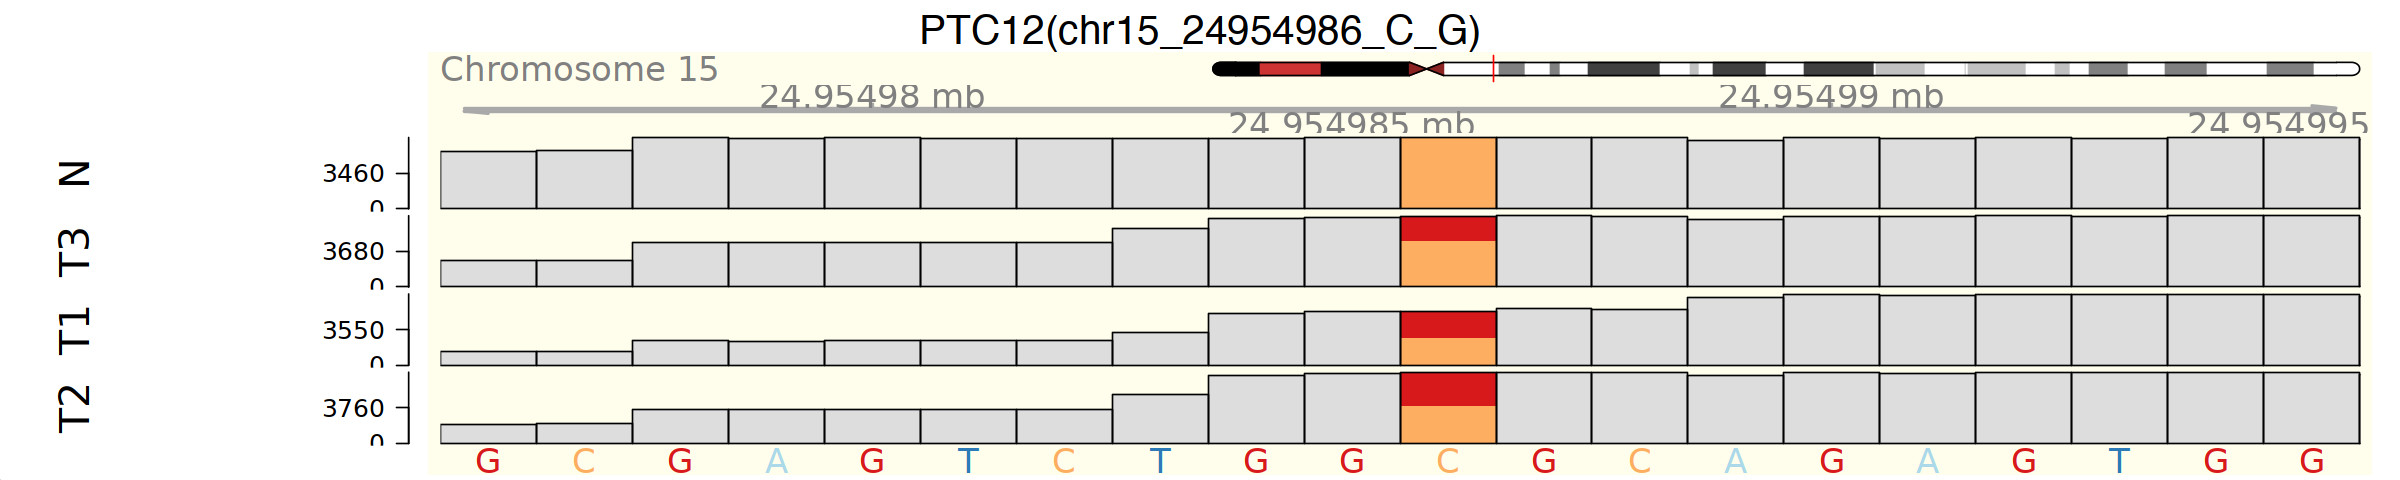

In [780]:
p='PTC12'
snv = 'chr15_24954986_C_G'
tissues = c('P', 'T3','T1','T2')
gene_name='SNRPN'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/SC_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end)),flag = scanBamFlag(isDuplicate = FALSE)),
      pileupParam = PileupParam(
          max_depth = 8000,  # same with samtools mpileup -h
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 13, # same with samtools mpileup -h
          #min_mapq=10,
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/SC_{p}_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

pdf 
  2

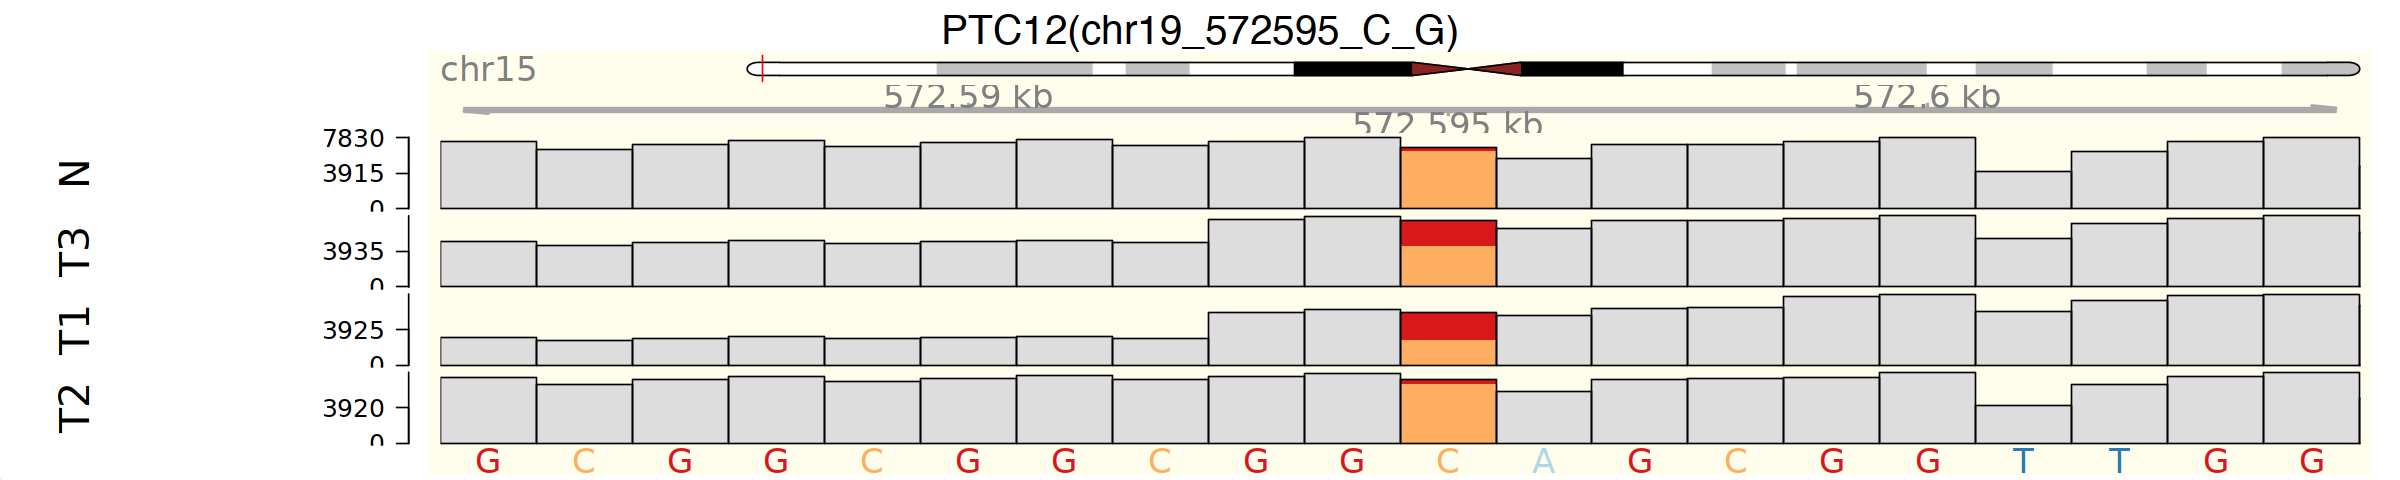

In [781]:
p='PTC12'
snv = 'chr19_572595_C_G'
tissues = c('P', 'T3','T1','T2')
gene_name='BSG'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/SC_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end)),flag = scanBamFlag(isDuplicate = FALSE)),
      pileupParam = PileupParam(
          max_depth = 8000,  # same with samtools mpileup -h
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 13, # same with samtools mpileup -h
          #min_mapq=10,
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/SC_{p}_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

pdf 
  2

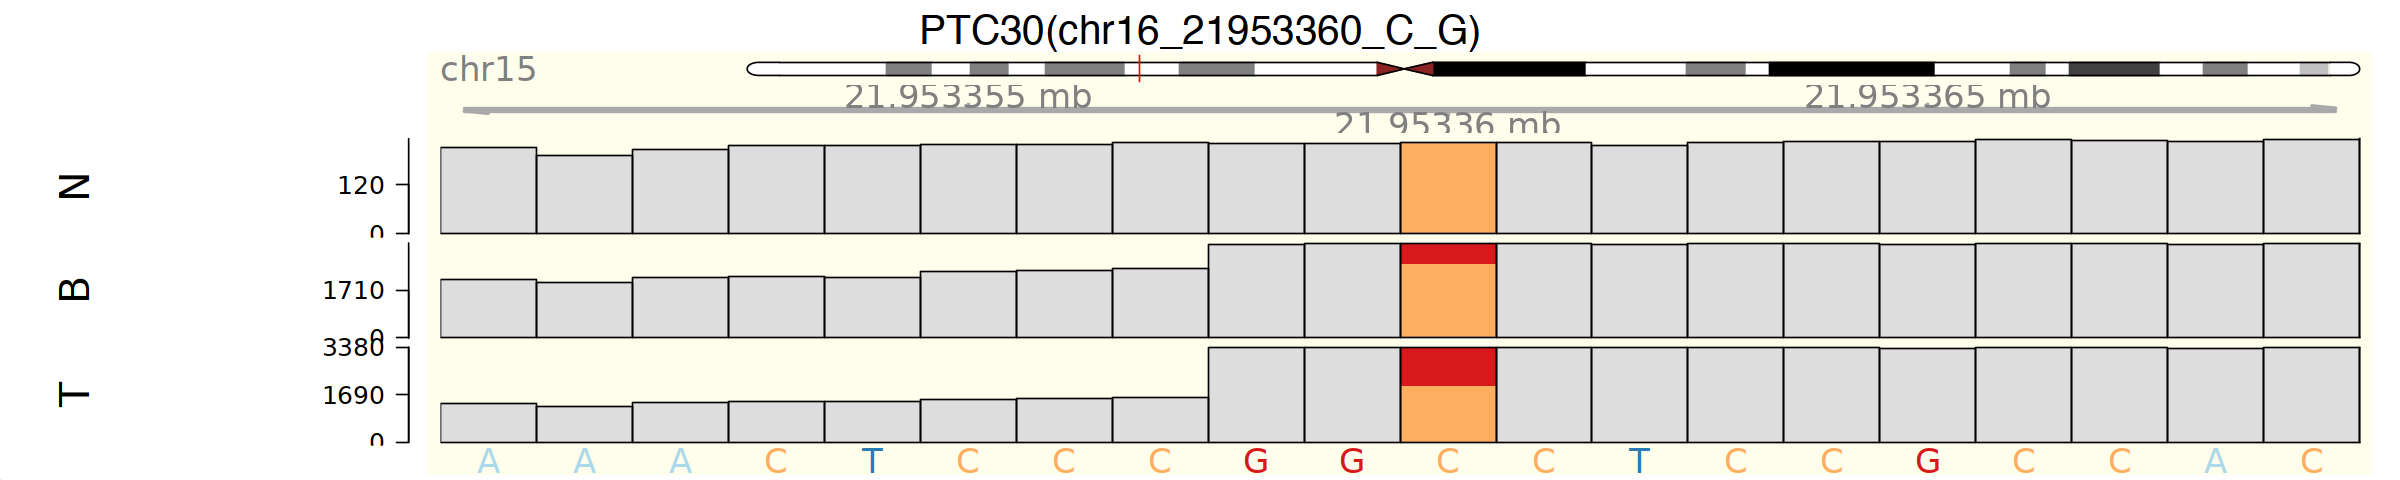

In [783]:
p='PTC30'
snv = 'chr16_21953360_C_G'
tissues = c('P', 'B','T')
gene_name='UQCRC2'
color_pos = c(pos_range+1)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/SC_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end)),flag = scanBamFlag(isDuplicate = FALSE)),
      pileupParam = PileupParam(
          max_depth = 8000,  # same with samtools mpileup -h
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          min_base_quality = 13, # same with samtools mpileup -h
          #min_mapq=10,
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/SC_{p}_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

# mtDNA SNV IGV

pdf 
  2

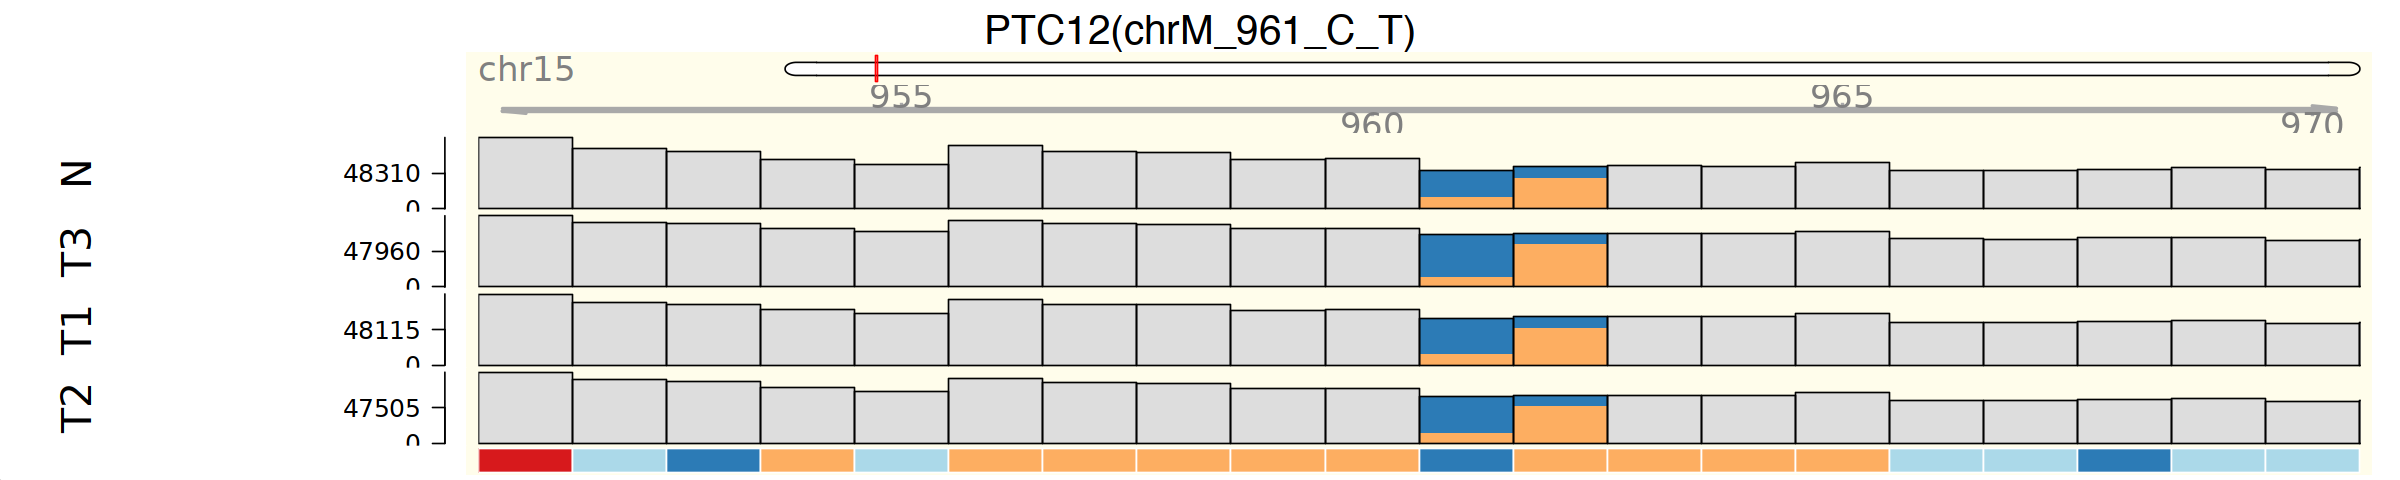

In [786]:
p='PTC12'
snv = 'chrM_961_C_T'
tissues = c('P', 'T3','T1','T2')
gene_name='chrM'
color_pos = c(pos_range+1,pos_range+2)
snv_c = strsplit(snv,'_')[[1]]
chr <- snv_c[1]
start <- as.integer(snv_c[2])-pos_range
end <- as.integer(snv_c[2])+pos_range
track_list = list(itrack,gtrack)
for(tissue in tissues){
    bam <- glue("'../Figure4/igv/mtDNA_bam/{p}_{tissue}_{gene_name}.bam'")
    bam_bai = paste0(bam, ".bai")
    pu <- pileup(
      file = bam,
      index = bam_bai,
      scanBamParam = ScanBamParam(which = GRanges(chr, IRanges(start, end)),flag = scanBamFlag(isDuplicate = FALSE)),
      pileupParam = PileupParam(
          max_depth = 100000,  # same with samtools mpileup -h
          distinguish_strands = FALSE,
          distinguish_nucleotides = TRUE,
          ignore_query_Ns = TRUE,
          #min_base_quality = 13, # same with samtools mpileup -h
          #min_mapq=10,
        )
    )
    df <- pu %>%
        as.data.frame() %>%
      group_by(pos, nucleotide) %>%
      summarise(count = sum(count), .groups = "drop") %>%
      complete(pos, nucleotide = c("A","C","G","T"), fill = list(count = 0)) %>%
      arrange(pos, nucleotide)
    df_wide <- df %>%
      dplyr::select(pos, nucleotide, count) %>%
      tidyr::pivot_wider(
        names_from = nucleotide,
        values_from = count,
        values_fill = 0
      ) %>%
      arrange(pos)
        gr <- GRanges(chr, IRanges(df_wide$pos, df_wide$pos))
        mat <- t(as.matrix(df_wide[, c("A","C","G","T"')]))
        # mat = apply(mat,2,function(x){
        #     tmp_freq = x/sum(x)
        #     x[which.max(x)] = x[which.max(x)] + sum(x[tmp_freq<alt_freq_thr])
        #     x[tmp_freq<alt_freq_thr]=0
        #     x
        # })

       Max_Depth <- max(colSums(mat), na.rm = TRUE)
        T3 <- ceiling(Max_Depth / 5) * 5
        
        # 2. 确定中间刻度 (T2)：将 Max_Depth 的一半四舍五入到最近的 5 的倍数
        T2_raw <- T3 / 2
        T2 <- round(T2_raw / 5) * 5
       y_ticks_at <- c(0, T2, T3)
       tmp_r = rownames(mat)
       new_mat = c()
       for(i in 1:ncol(mat)){
           tmp_x = mat[,i]
           if(i%in%color_pos){
               new_mat = cbind(new_mat, c(tmp_x,0))
           }else{
               new_mat = cbind(new_mat, c(0,0,0,0, sum(tmp_x)))
           }
       }
       mat = new_mat
       rownames(mat) = c(tmp_r,'NoSNV')
    
       tmp_title = ifelse(tissue=='P', 'N', tissue)
        track_stacked <- DataTrack(
          range = gr,
          data = mat[c('"A","C","G","T","NoSNV"),],
          type = "histogram"',      # bar_plot
            groups = c('"A","C","G","NoSNV","T"),
            stacking = "stack"',      # 堆叠！
            col.histogram = 'black',
            col = base_colors[c('"A","C","G","T","NoSNV")],           
            legend = F,
            name = tmp_title,
            yTicksAt=y_ticks_at
        )
    track_list = c(track_list,track_stacked)
}
track_list = c(track_list, sTrack)

plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = "white",
           background.panel = "#FFFDEB",
           col.title = "black"',      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )

pdf(glue('{output_dir}/mtDNA_{p}_{snv}.pdf'), width = 10, height = 8)
plotTracks(track_list, chromosome = chr, from = start, to = end, cex = 2,
           main = glue('{p}({snv})'),
           background.title = '"#dddddd",
           background.panel = "#FFFDEB",
           col.title = "black",      # 轨道标题文本颜色设置为白色
            cex.title = 2,
           col.axis='black', cex.axis=1.2
          )
dev.off()

In [787]:
mat[,11:12]

A,51,52
C,14515,50244
G,34,15
T,47915,13568
NoSNV,0,0
